<a href="https://colab.research.google.com/github/seonhong416/Job-Care/blob/kimseonhong/job_care_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 모듈 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 속성명이 같은 경우 (ex : 속성 D) 동일한 코드를 가지고 있으면 동일한 내용을 포함하고 있다. 즉 회원 속성과 컨텐츠 속성의 일치여부 및 수치를 비교할 수 있다.
(순서형 : 속성E 명목형 : 속성A, 속성C, 속성D, 속성H



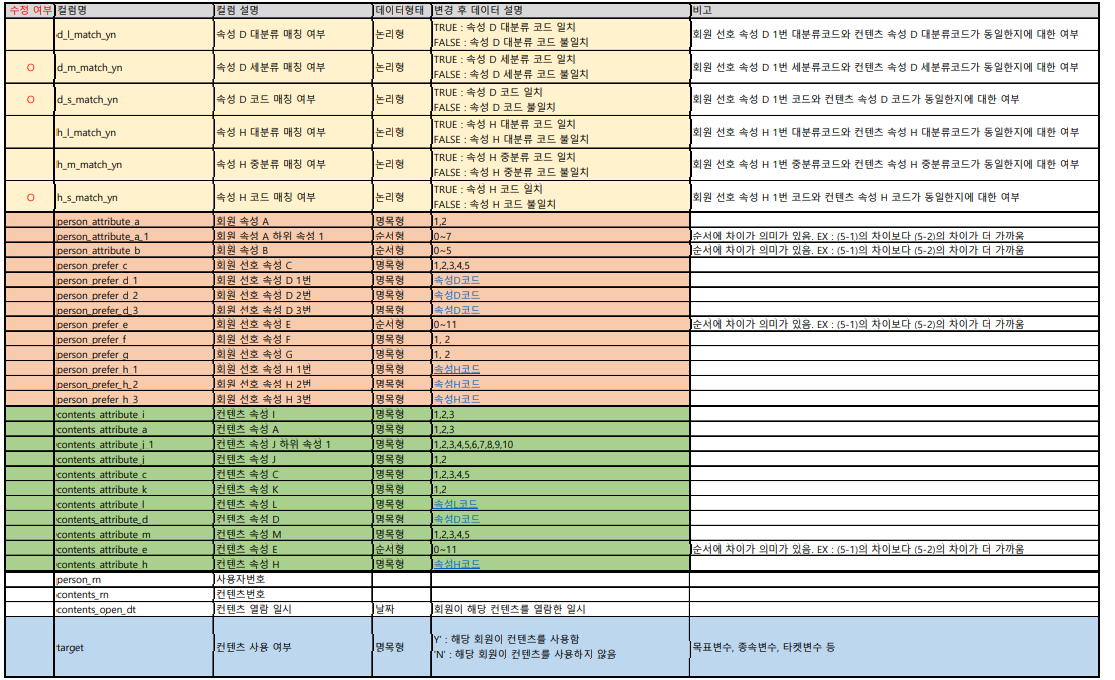

In [2]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/jobcare/train.csv',parse_dates=['contents_open_dt'])

d_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_D_코드.csv', index_col=0).T.to_dict()

h_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_H_코드.csv', index_col=0).T.to_dict()

l_code = pd.read_csv('/content/drive/MyDrive/jobcare/속성_L_코드.csv', index_col=0).T.to_dict()

test = pd.read_csv('/content/drive/MyDrive/jobcare/test.csv',parse_dates=['contents_open_dt'])

In [3]:
# 데이터 보기
data.head()

id  d_l_match_yn  d_m_match_yn  ...  contents_rn    contents_open_dt  target
0   0          True          True  ...       354805 2020-01-17 12:09:36       1
1   1         False         False  ...       346213 2020-06-18 17:48:52       0
2   2         False         False  ...       206408 2020-07-08 20:00:10       0
3   3         False         False  ...       572323 2020-01-13 18:09:34       0
4   4          True          True  ...       573899 2020-03-09 20:39:22       0

[5 rows x 35 columns]

In [4]:
test.head()

id  d_l_match_yn  d_m_match_yn  ...  person_rn  contents_rn    contents_open_dt
0   0          True         False  ...     393790       236865 2020-12-01 02:24:18
1   1         False         False  ...     394058       236572 2020-12-17 05:42:53
2   2          True         False  ...    1002061       704612 2020-12-10 23:33:41
3   3          True         False  ...    1000813       704652 2020-12-03 19:44:55
4   4          True         False  ...     111146       704413 2020-12-11 21:24:34

[5 rows x 34 columns]

In [5]:
print(data.shape)
print(test.shape)


(501951, 35)
(46404, 34)


In [6]:
#결측치 확인하기
data.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
target                    0
dtype: int64

In [7]:
test.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
dtype: int64

모든데이터 결측치 없음을 확인

In [8]:
# 각 칼럼의 value_counts 확인
for i in data.columns : 
  print( i,'의 value_count')
  print(data[i].value_counts())
  print('-'*50)

id 의 value_count
2047      1
427130    1
439420    1
441469    1
435326    1
         ..
131861    1
138006    1
135959    1
158488    1
0         1
Name: id, Length: 501951, dtype: int64
--------------------------------------------------
d_l_match_yn 의 value_count
True     315268
False    186683
Name: d_l_match_yn, dtype: int64
--------------------------------------------------
d_m_match_yn 의 value_count
False    368324
True     133627
Name: d_m_match_yn, dtype: int64
--------------------------------------------------
d_s_match_yn 의 value_count
False    426694
True      75257
Name: d_s_match_yn, dtype: int64
--------------------------------------------------
h_l_match_yn 의 value_count
True     399338
False    102613
Name: h_l_match_yn, dtype: int64
--------------------------------------------------
h_m_match_yn 의 value_count
False    318818
True     183133
Name: h_m_match_yn, dtype: int64
--------------------------------------------------
h_s_match_yn 의 value_count
False    365322
Tru

코드를 그대로 사용했습니다.

https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

- 변경된 데이터에 맞도록 코드를 수정하였습니다.
- 매칭 여부 컬럼 (1~6 번째 컬럼) 과 속성코드로부터 구한 매칭 여부를 비교했습니다. (모두 일치)

제공 데이터에는 훈련, 테스트 데이터와 속성 코드 파일이 나뉘어 있습니다.
아래 코드는 데이터와 속성 코드를 매칭해 줍니다.

분류코드에 따라 아래와 같이 구분자를 붙혀 구분합니다.

n: 세분류코드 

s: 소분류코드   

m: 중분류코드 

l: 대분류코드 

In [9]:
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    drop_column = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','contents_attribute_d','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_h','contents_attribute_l']

    for i in drop_column:
        df = df.drop(i, axis = 1)
    return df

train_data = add_code(data, d_code, h_code, l_code)
test_data = add_code(test, d_code, h_code, l_code)

print(train_data.shape)
print(test_data.shape)

(501951, 54)
(46404, 53)


In [10]:
train_data.head()

id  d_l_match_yn  ...  contents_attribute_l_m  contents_attribute_l_l
0   0          True  ...                    1605                    2016
1   1         False  ...                    1605                    2016
2   2         False  ...                    1572                    2016
3   3         False  ...                    1605                    2016
4   4          True  ...                    1605                    2016

[5 rows x 54 columns]

In [11]:
test_data.head()

id  d_l_match_yn  ...  contents_attribute_l_m  contents_attribute_l_l
0   0          True  ...                    1021                    2010
1   1         False  ...                    1605                    2016
2   2          True  ...                    1810                    2020
3   3          True  ...                      99                    2006
4   4          True  ...                     954                    2009

[5 rows x 53 columns]

In [12]:
# True = 1, False = 0 으로 바꿔주기

for i in train_data.columns[1:7] :
  train_data[i+'_1'] = 0
for i in train_data.columns[1:7] :
  train_data.loc[train_data[i] == True, i+'_1'] = 1

In [13]:
for i in train_data.columns[1:7] : 
  train_data[i] = train_data[i+'_1']

In [14]:
train_data = train_data.drop(['d_l_match_yn_1', 'd_m_match_yn_1', 'd_s_match_yn_1',
       'h_l_match_yn_1', 'h_m_match_yn_1', 'h_s_match_yn_1'], axis = 1)

In [15]:
train_data

id  d_l_match_yn  ...  contents_attribute_l_m  contents_attribute_l_l
0            0             1  ...                    1605                    2016
1            1             0  ...                    1605                    2016
2            2             0  ...                    1572                    2016
3            3             0  ...                    1605                    2016
4            4             1  ...                    1605                    2016
...        ...           ...  ...                     ...                     ...
501946  501946             0  ...                     346                    2006
501947  501947             1  ...                      99                    2006
501948  501948             1  ...                     407                    2006
501949  501949             1  ...                     651                    2006
501950  501950             1  ...                     759                    2006

[501951 rows x 54 columns]

In [16]:
for i in test_data.columns[1:7] :
  test_data[i+'_1'] = 0
for i in test_data.columns[1:7] :
  test_data.loc[test_data[i] == True, i+'_1'] = 1

for i in test_data.columns[1:7] : 
  test_data[i] = test_data[i+'_1']

test_data = test_data.drop(['d_l_match_yn_1', 'd_m_match_yn_1', 'd_s_match_yn_1',
       'h_l_match_yn_1', 'h_m_match_yn_1', 'h_s_match_yn_1'], axis = 1)

In [17]:
test_data

id  d_l_match_yn  ...  contents_attribute_l_m  contents_attribute_l_l
0          0             1  ...                    1021                    2010
1          1             0  ...                    1605                    2016
2          2             1  ...                    1810                    2020
3          3             1  ...                      99                    2006
4          4             1  ...                     954                    2009
...      ...           ...  ...                     ...                     ...
46399  46399             1  ...                     759                    2006
46400  46400             1  ...                     759                    2006
46401  46401             1  ...                     759                    2006
46402  46402             1  ...                     759                    2006
46403  46403             1  ...                     759                    2006

[46404 rows x 53 columns]

In [18]:
train_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_m',
       'contents_attribute_e', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_

# 각 칼럼 별 상관계수를 알아보자

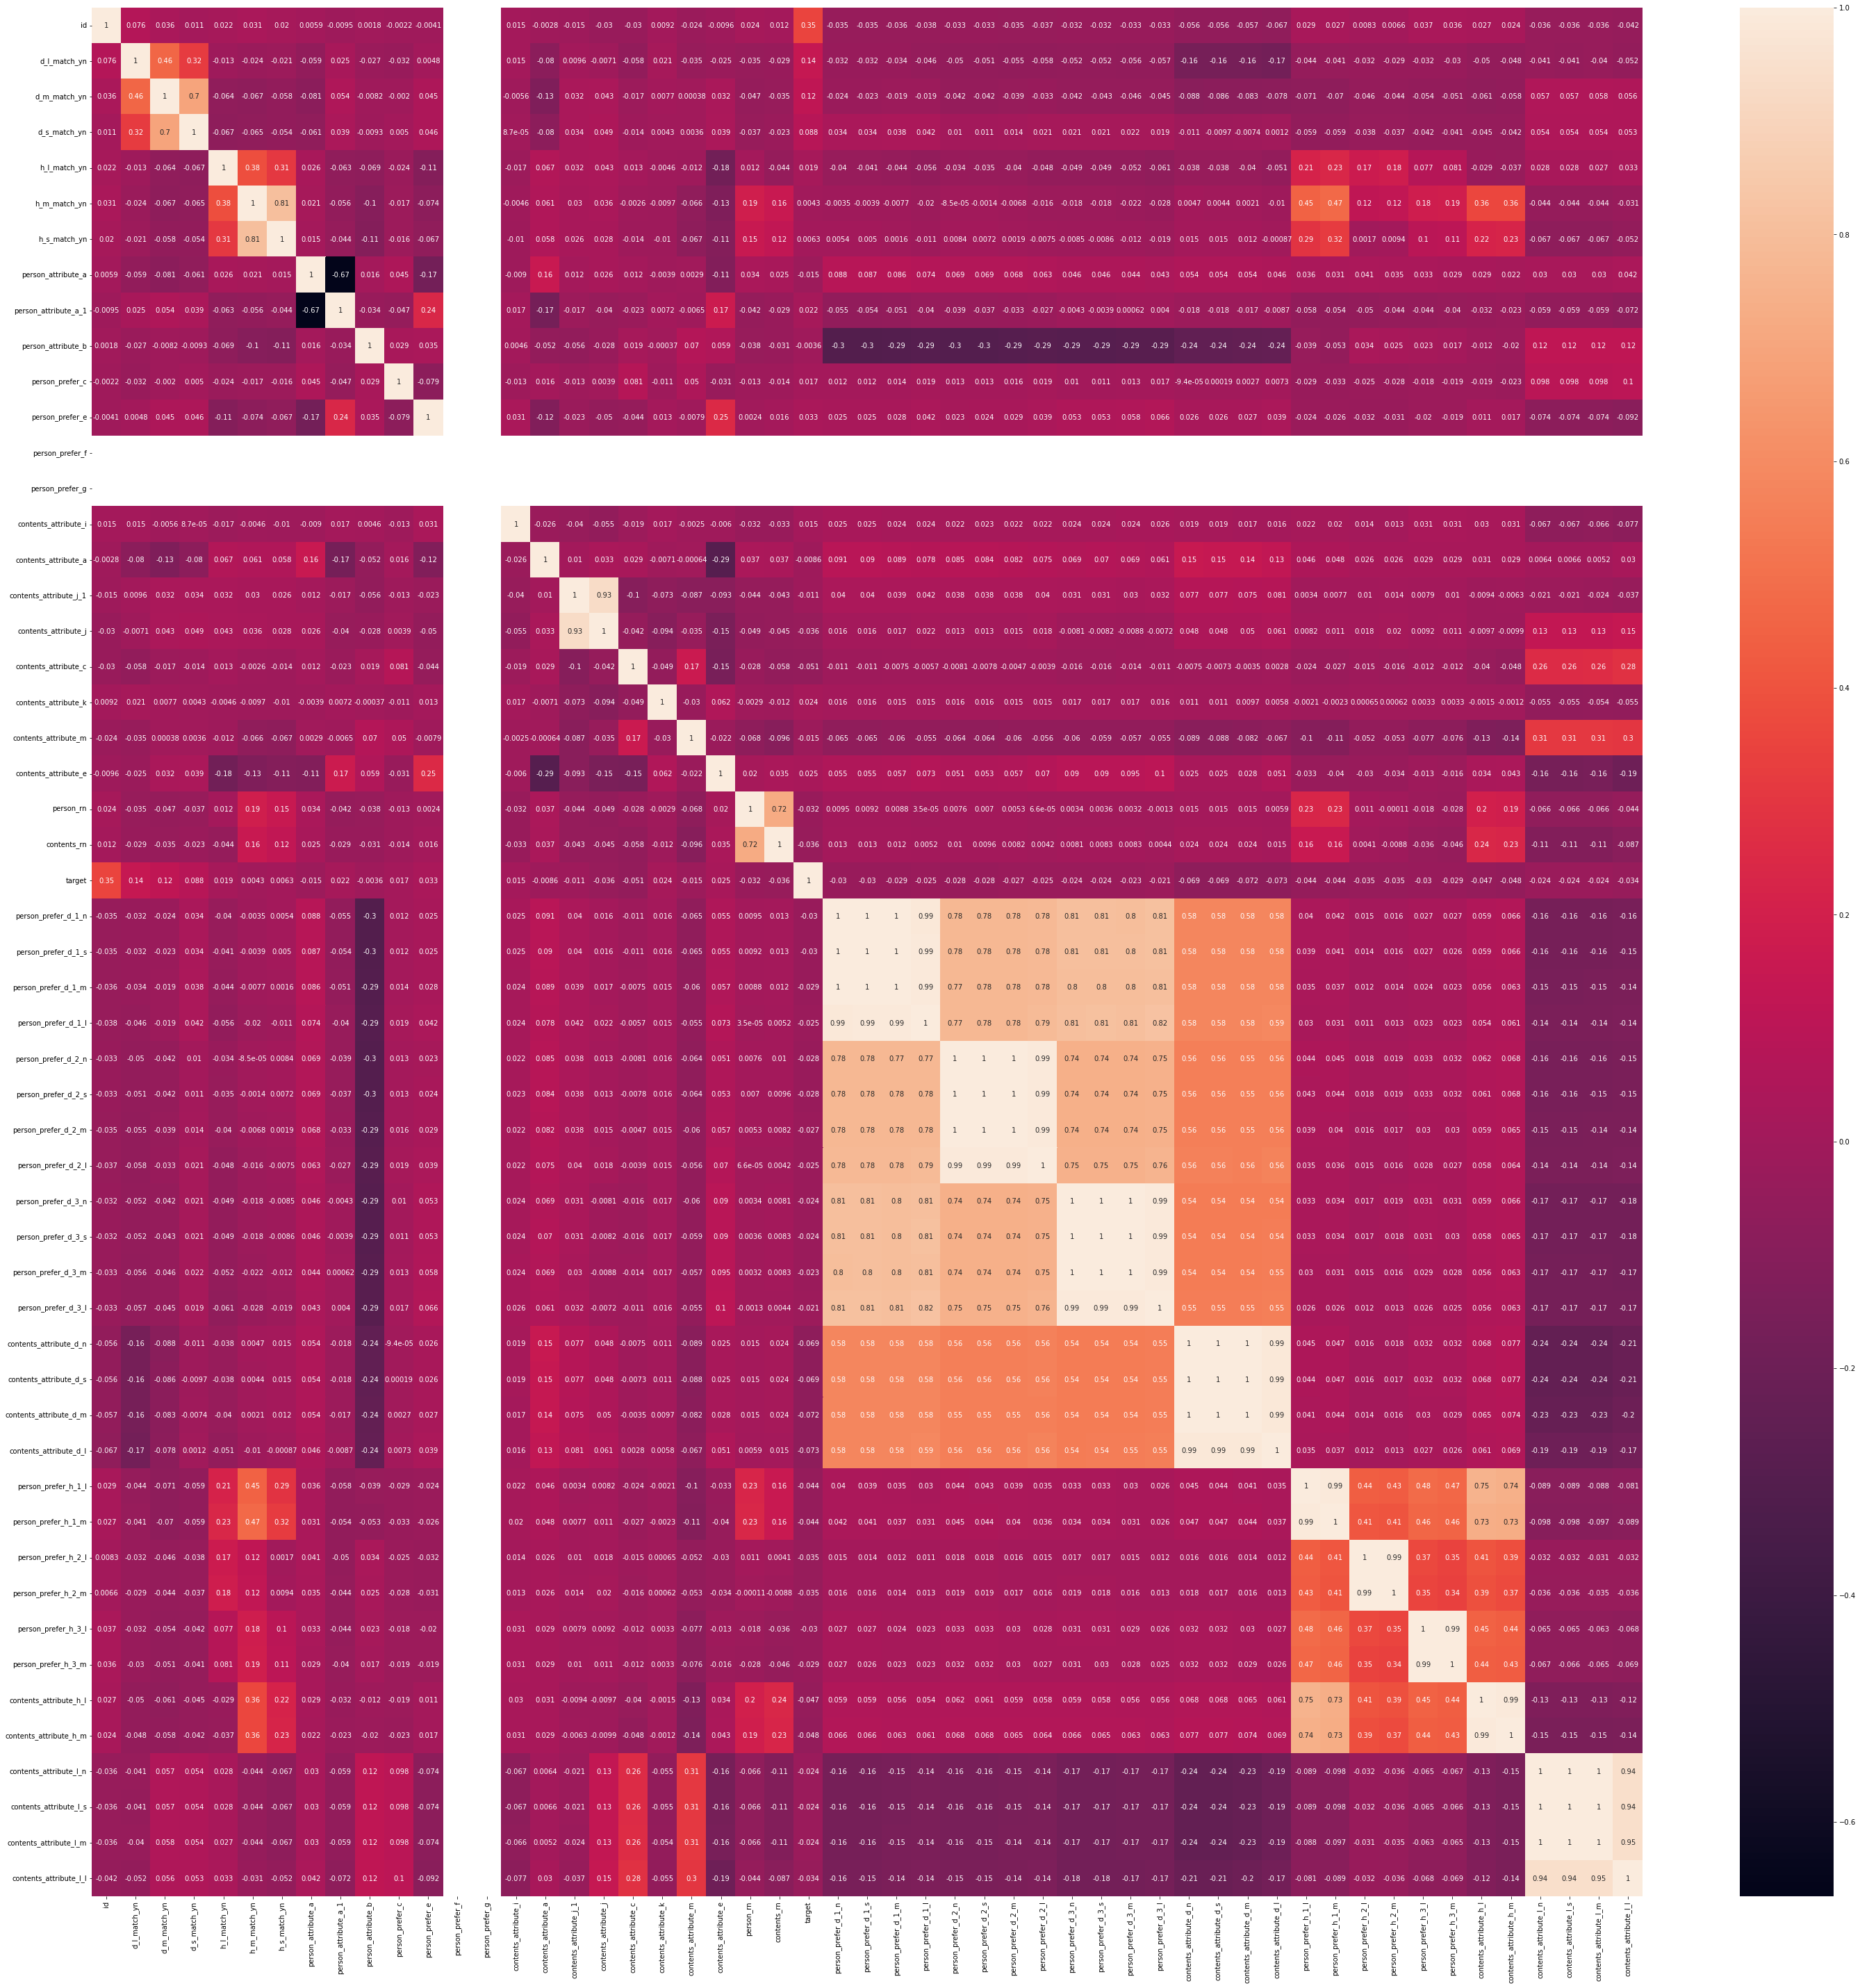

In [19]:
plt.figure(figsize = (50, 50))
sns.heatmap(train_data.corr(), annot = True)

# 각 속성별 분포를 알아보자

## 회원 A 속성

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

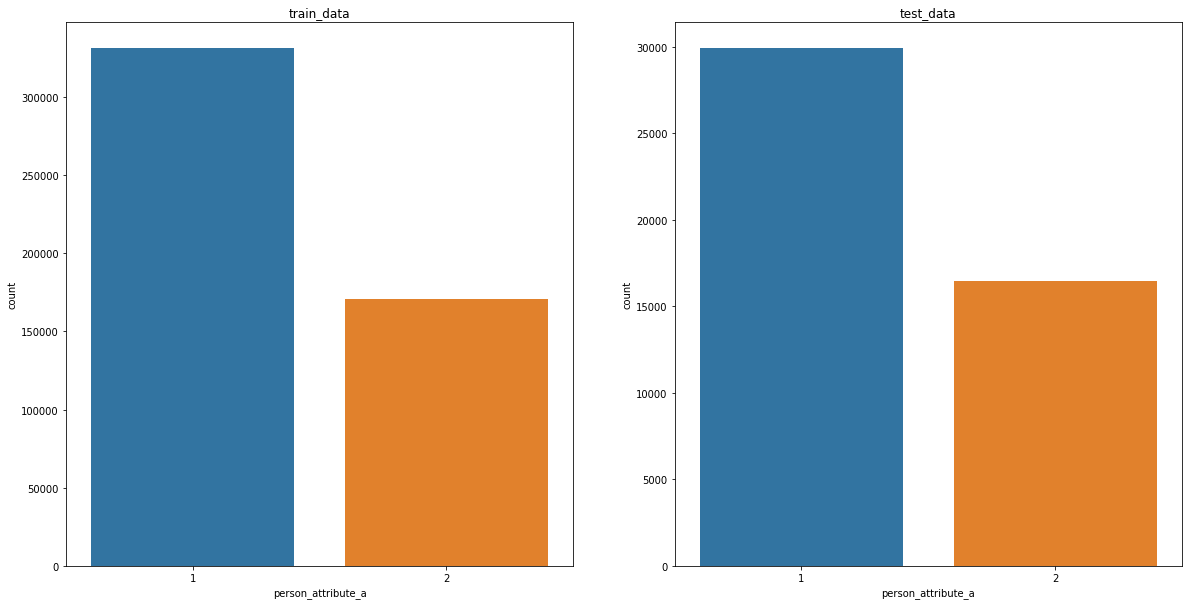

In [20]:
# person_attribute_a
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_a'], ax = ax[0])
sns.countplot(test_data['person_attribute_a'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

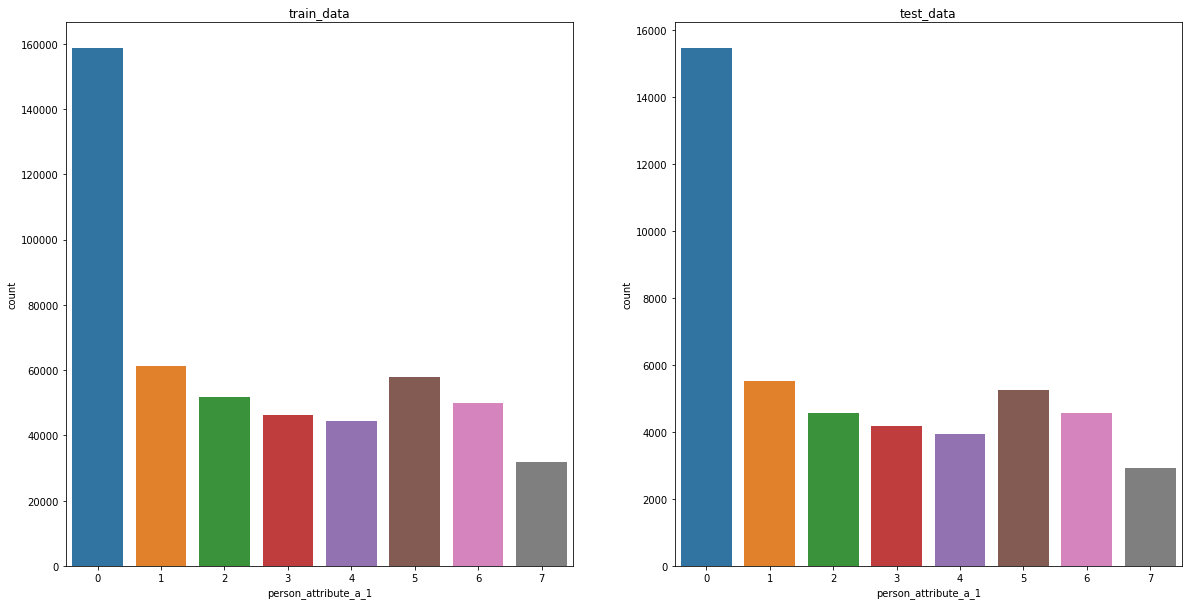

In [21]:
# person_attribute_a_1
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_a_1'], ax = ax[0])
sns.countplot(test_data['person_attribute_a_1'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

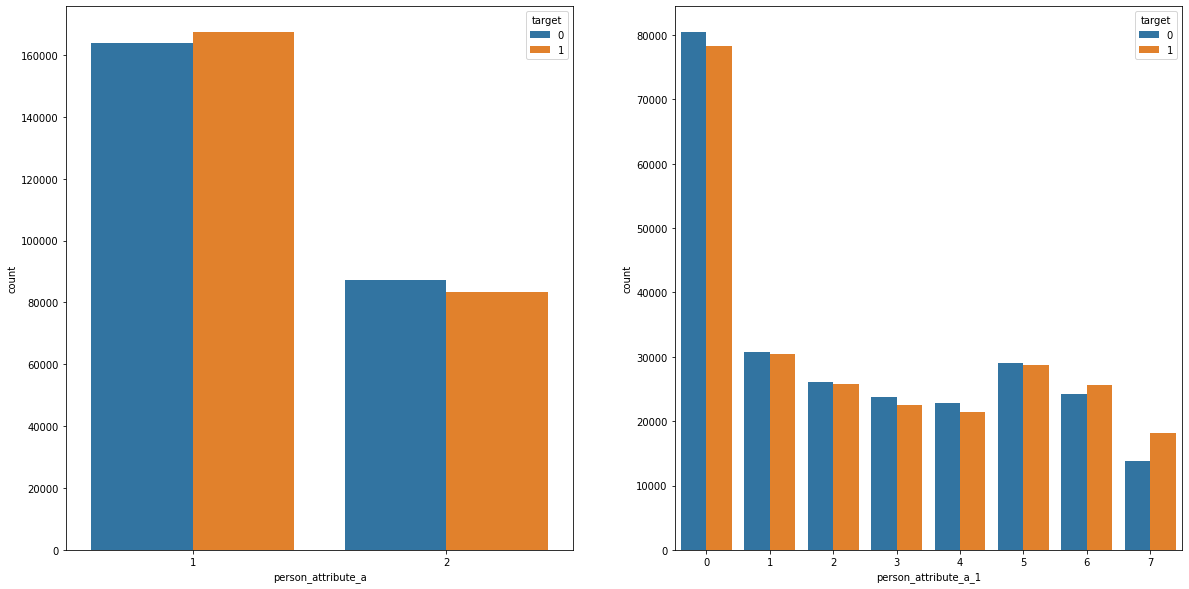

In [22]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_attribute_a', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_attribute_a_1', hue = 'target', ax = ax[1])

## 회원 B 속성

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

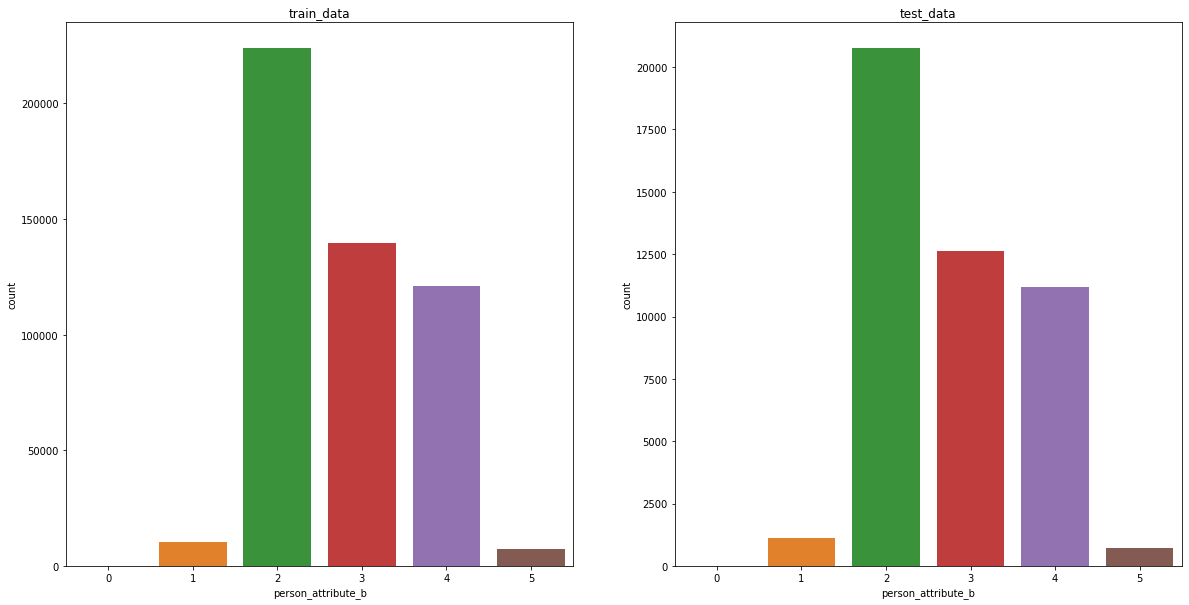

In [23]:
# person_attribute_b
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_attribute_b'], ax = ax[0])
sns.countplot(test_data['person_attribute_b'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

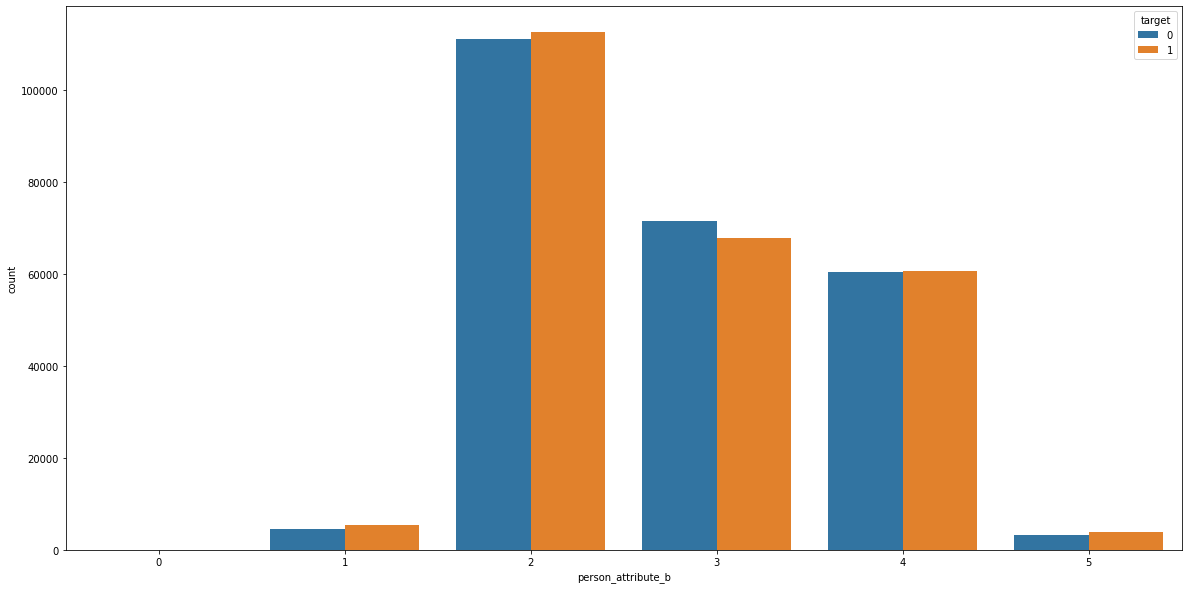

In [24]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_attribute_b', hue = 'target')

## 회원 선호 속성 C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

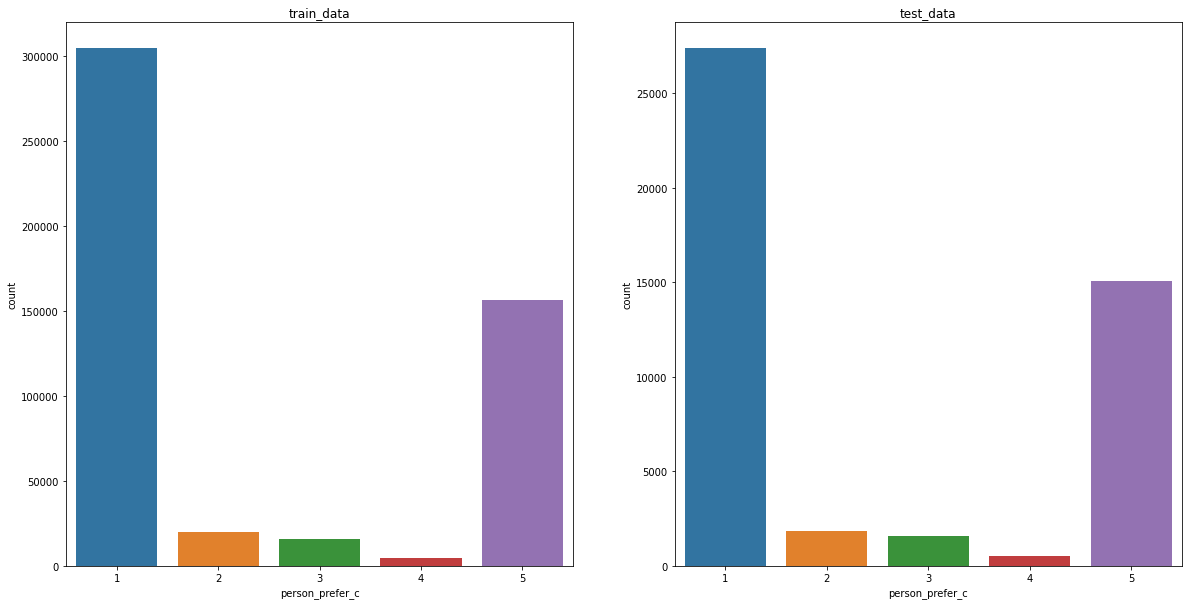

In [25]:
# person_prefer_c
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_c'], ax = ax[0])
sns.countplot(test_data['person_prefer_c'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

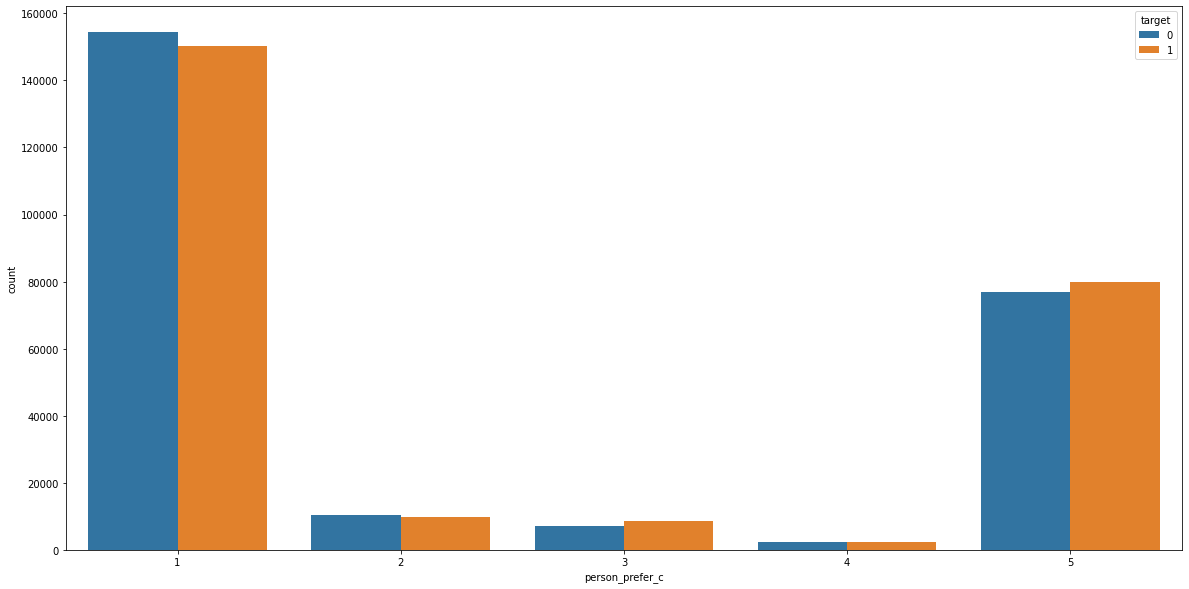

In [26]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_c', hue = 'target')

## 회원 선호 속성 D

train에는 있고 test에는 없는 데이터들이 있다(이러한 부분들은 어떻게 해야 될지 생각을 해보자)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

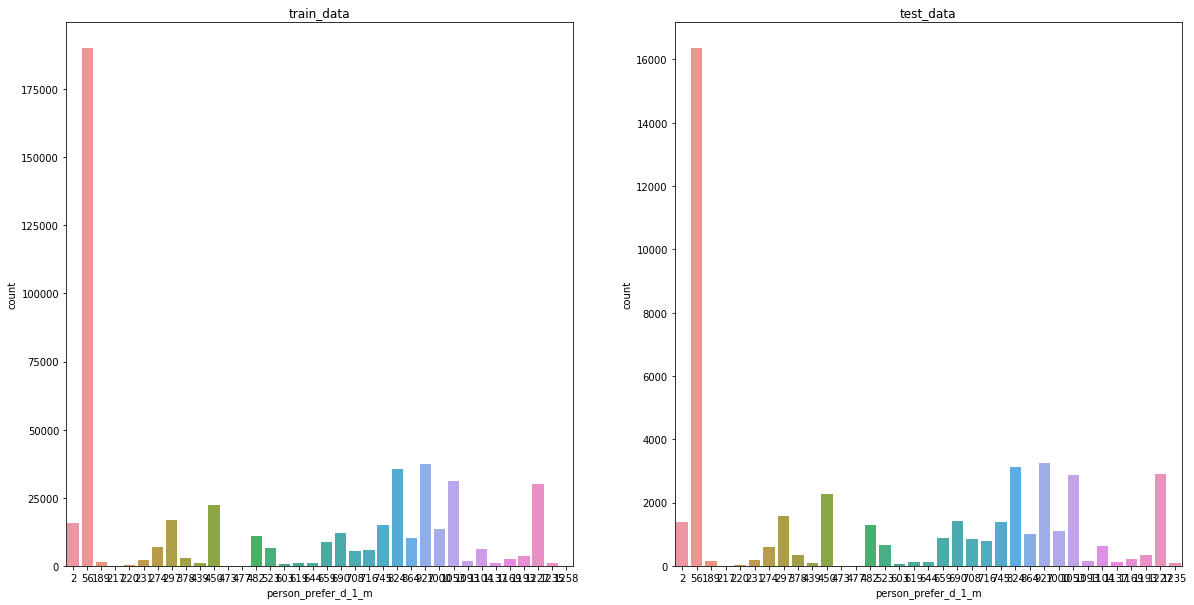

In [27]:
# person_prefer_d_1_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_1_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_1_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

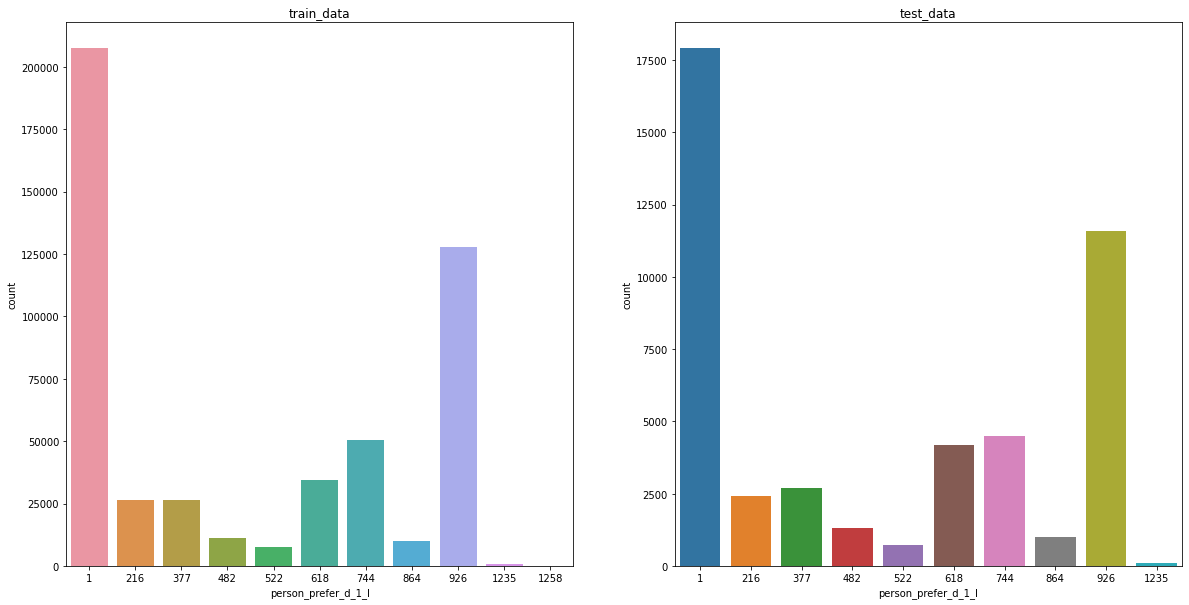

In [28]:
# person_prefer_d_1_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_1_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_1_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

In [29]:
print('train : ', train_data['person_prefer_d_1_l'].value_counts())
print('test : ', test_data['person_prefer_d_1_l'].value_counts())

train :  1       207446
926     127675
744      50314
618      34409
377      26351
216      26244
482      11144
864      10069
522       7398
1235       897
1258         4
Name: person_prefer_d_1_l, dtype: int64
test :  1       17907
926     11592
744      4506
618      4191
377      2701
216      2404
482      1294
864      1002
522       710
1235       97
Name: person_prefer_d_1_l, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

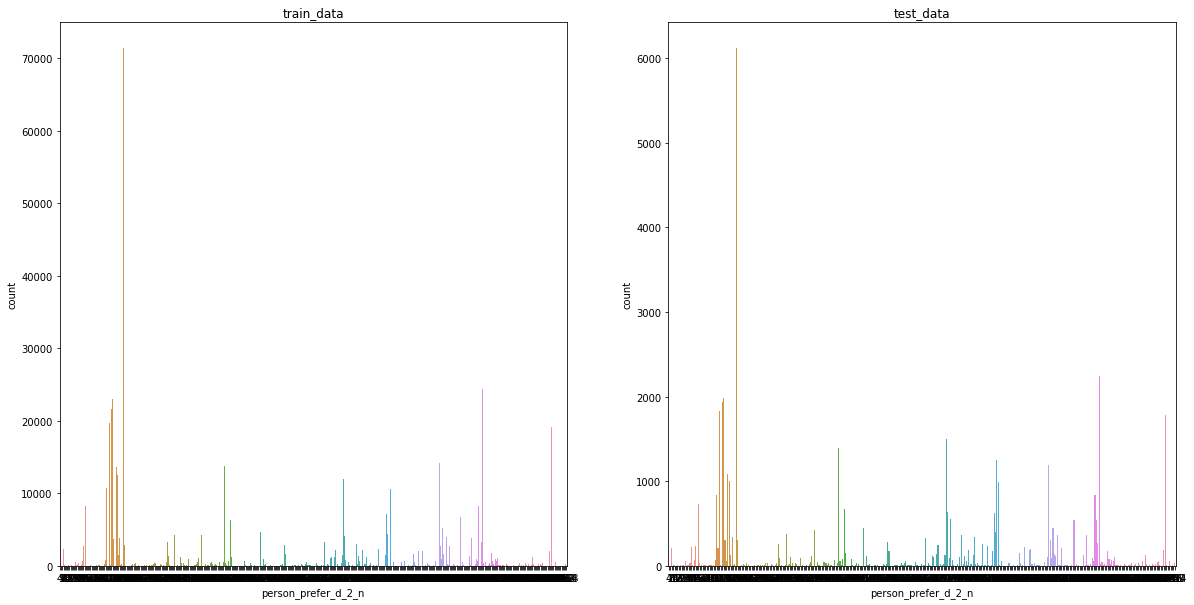

In [30]:
# person_prefer_d_2_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_n'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

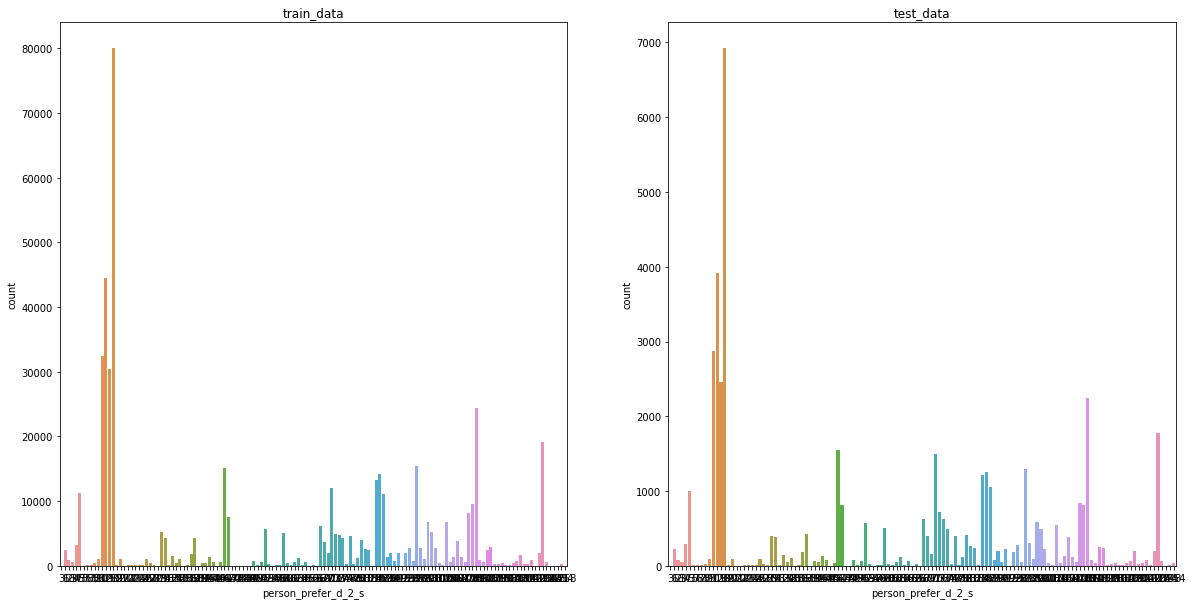

In [31]:
# person_prefer_d_2_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_s'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

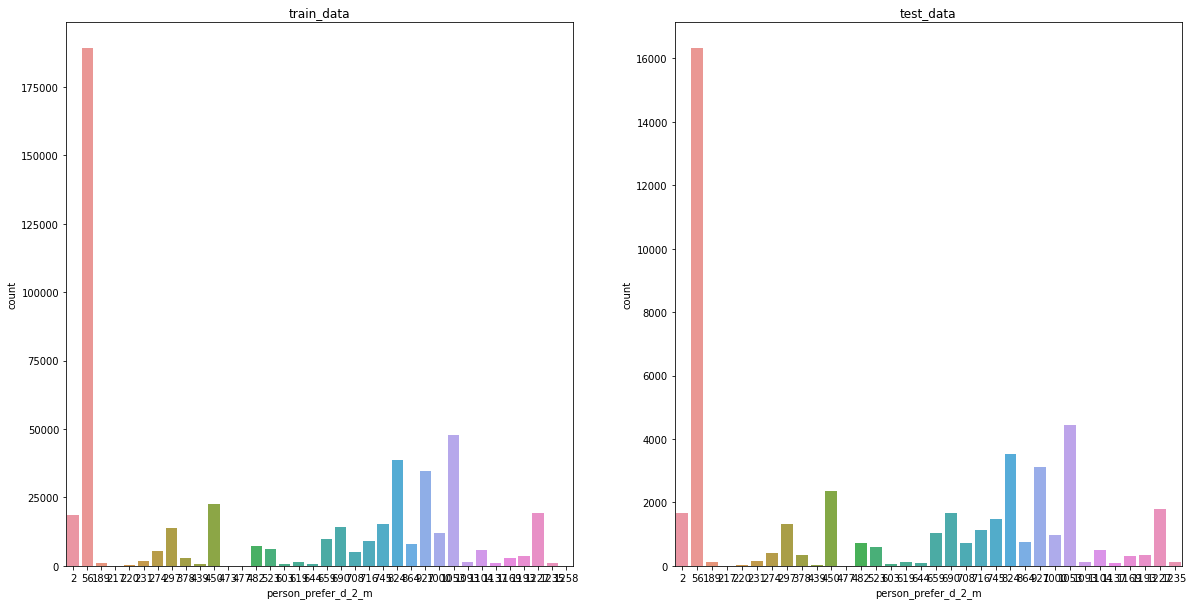

In [32]:
# person_prefer_d_2_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

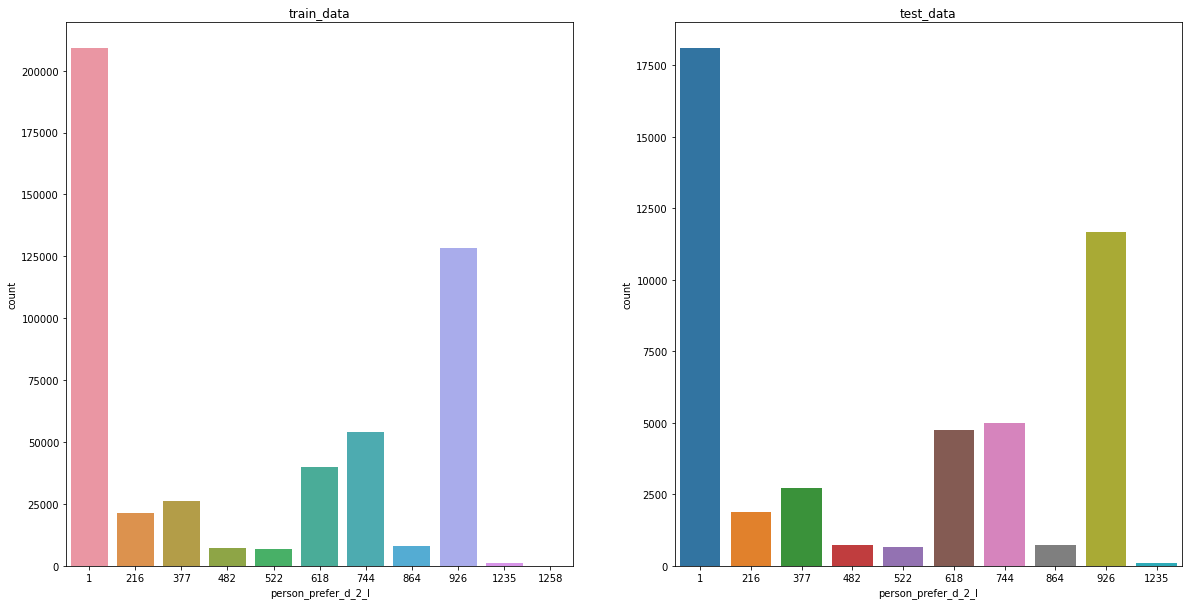

In [33]:
# person_prefer_d_2_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_2_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_2_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

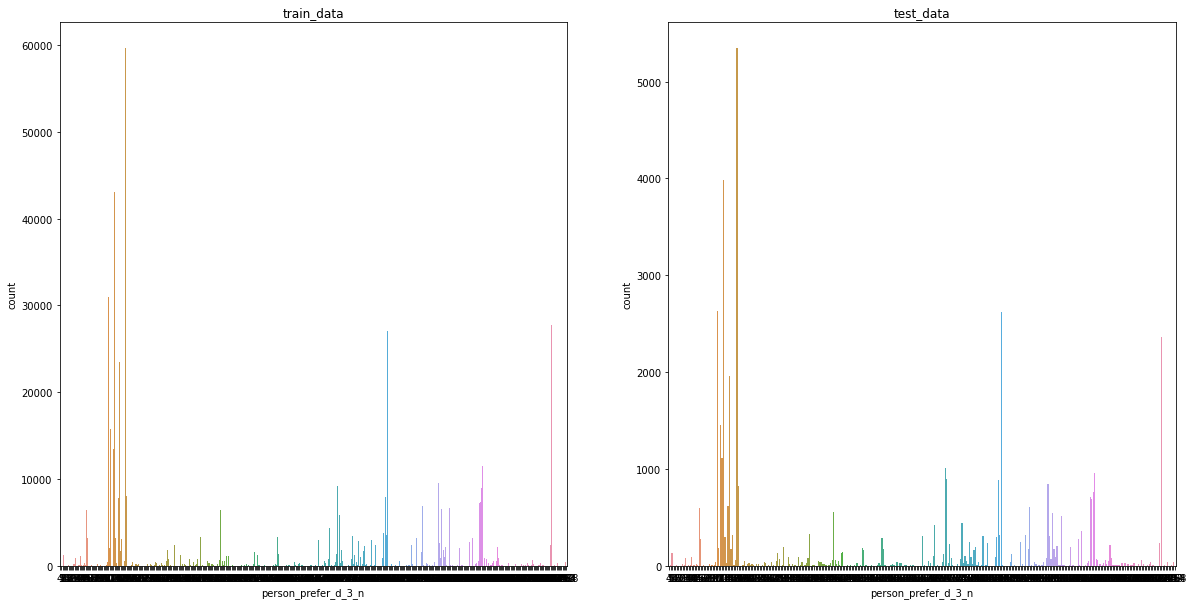

In [34]:
# person_prefer_d_3_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_n'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

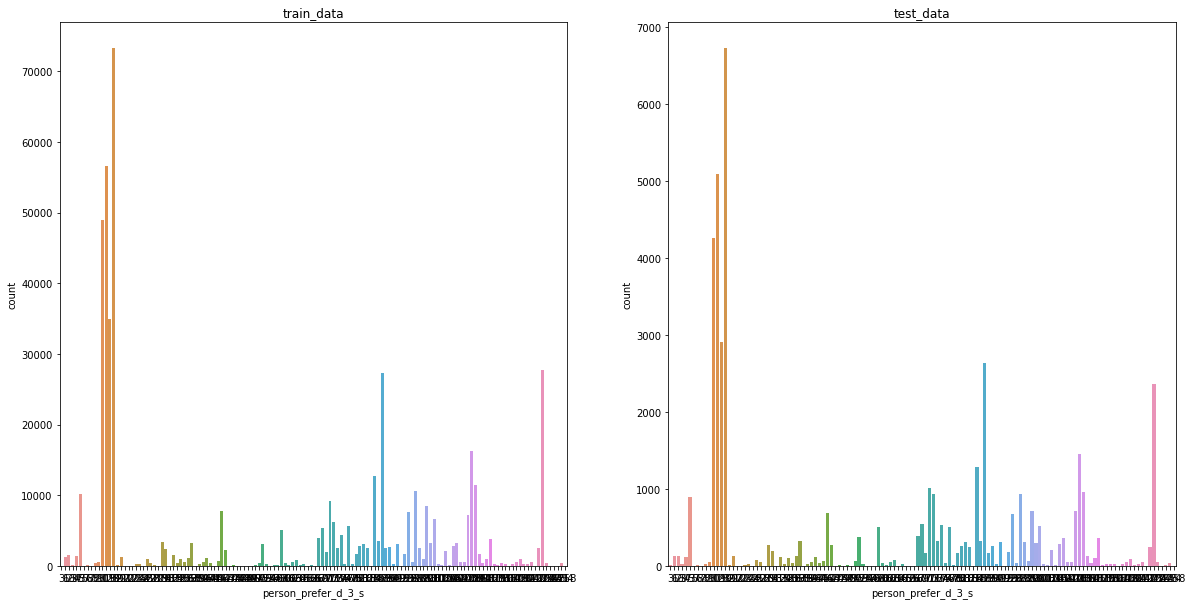

In [35]:
# person_prefer_d_3_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_s'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

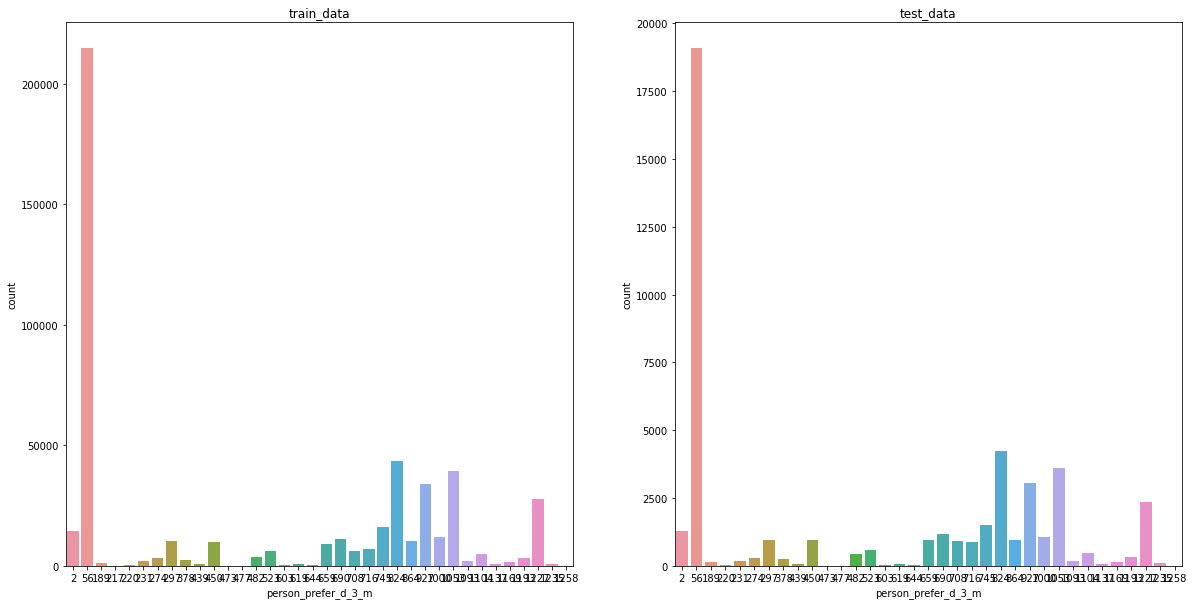

In [36]:
# person_prefer_d_3_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

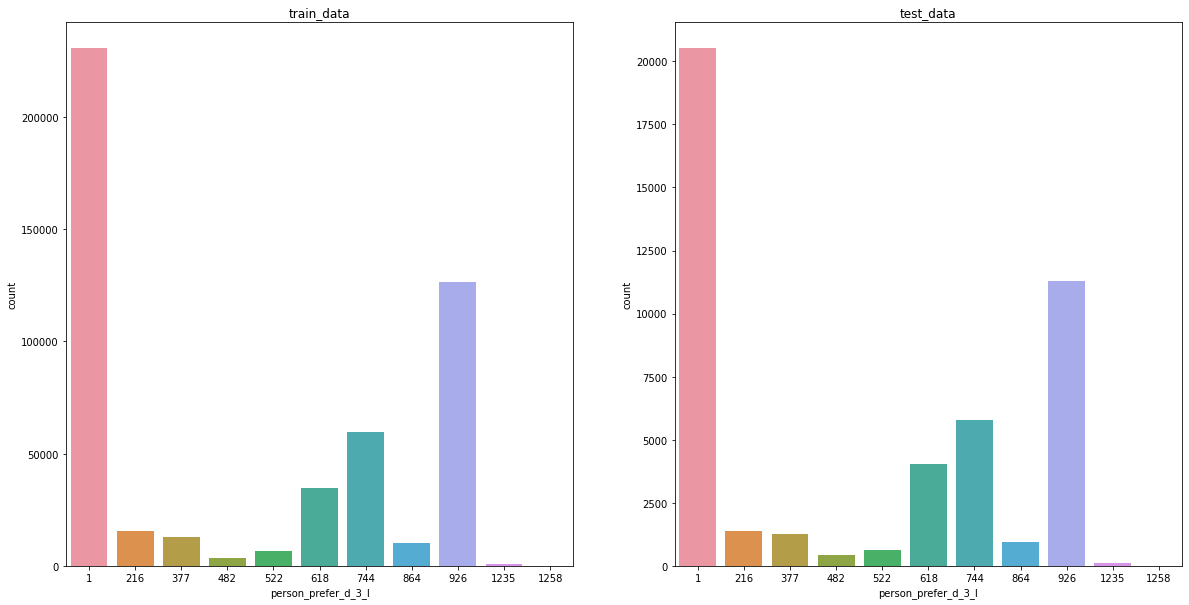

In [37]:
# person_prefer_d_3_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_d_3_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_d_3_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

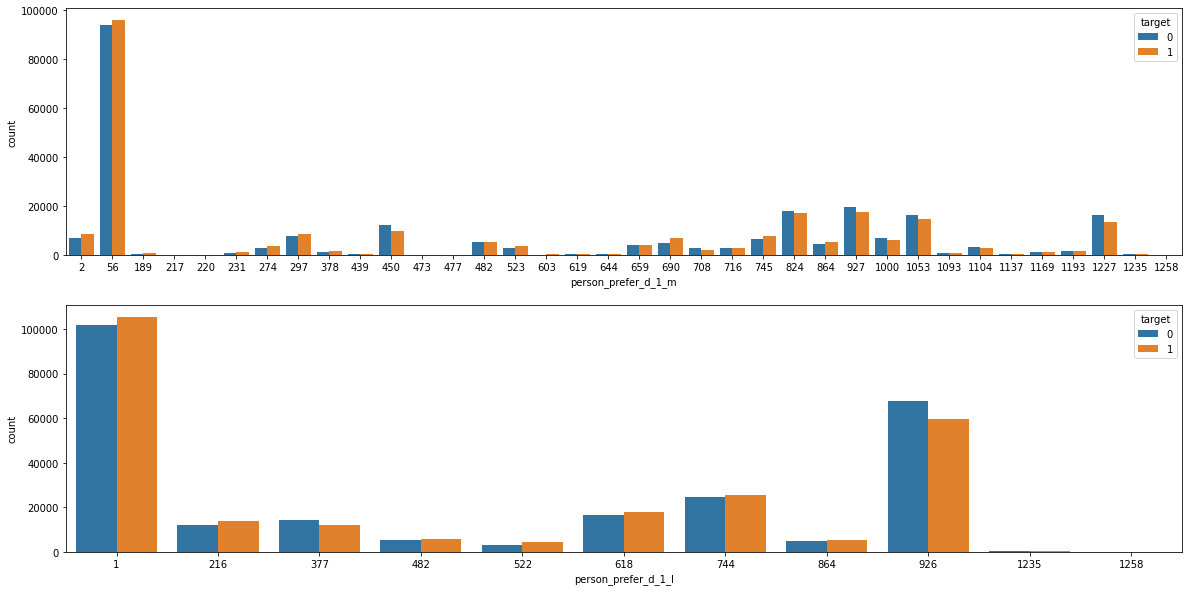

In [38]:
fig, ax = plt.subplots(nrows = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_1_m', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_1_l', hue = 'target', ax = ax[1])

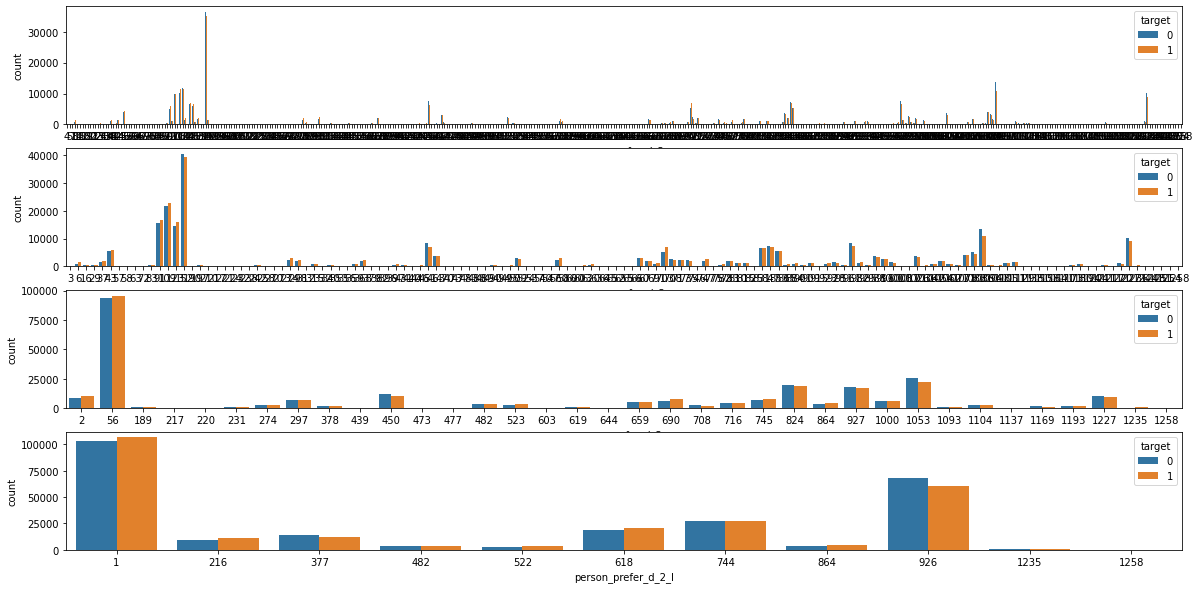

In [39]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_2_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_2_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'person_prefer_d_2_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'person_prefer_d_2_l', hue = 'target', ax = ax[3])

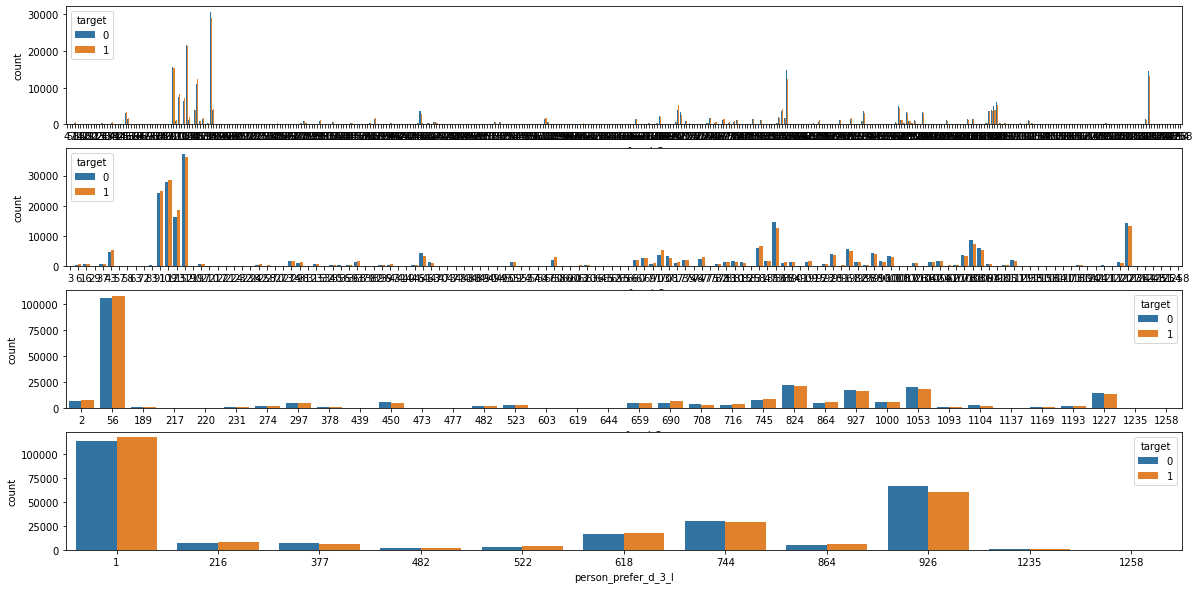

In [40]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_d_3_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_d_3_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'person_prefer_d_3_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'person_prefer_d_3_l', hue = 'target', ax = ax[3])

## 회원 선호 속성 E

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

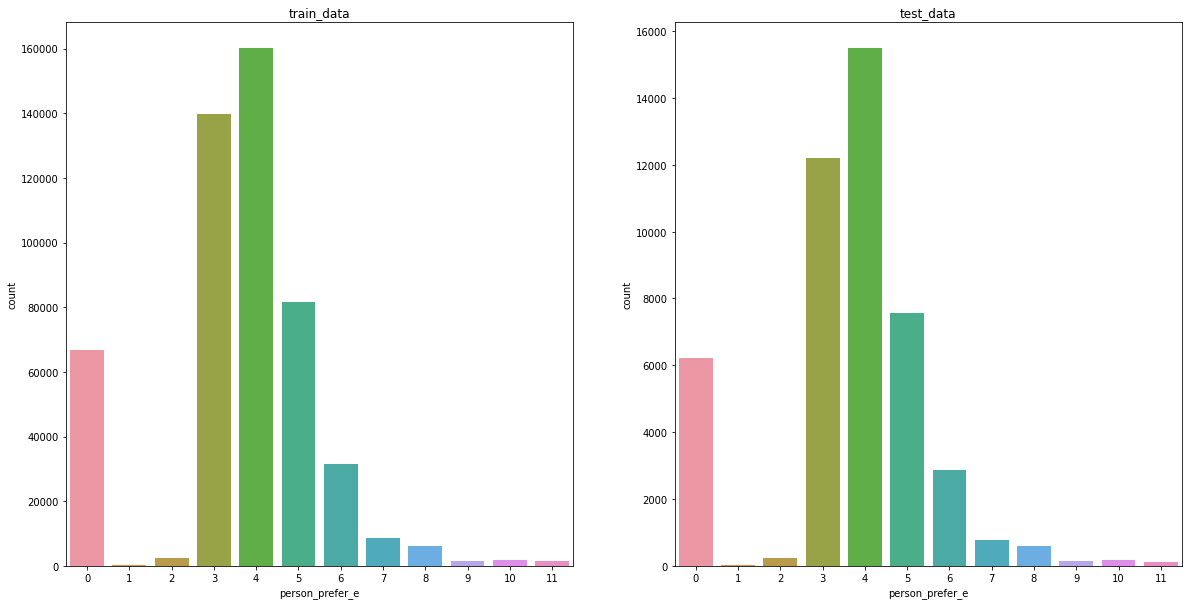

In [41]:
# person_prefer_e
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_e'], ax = ax[0])
sns.countplot(test_data['person_prefer_e'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

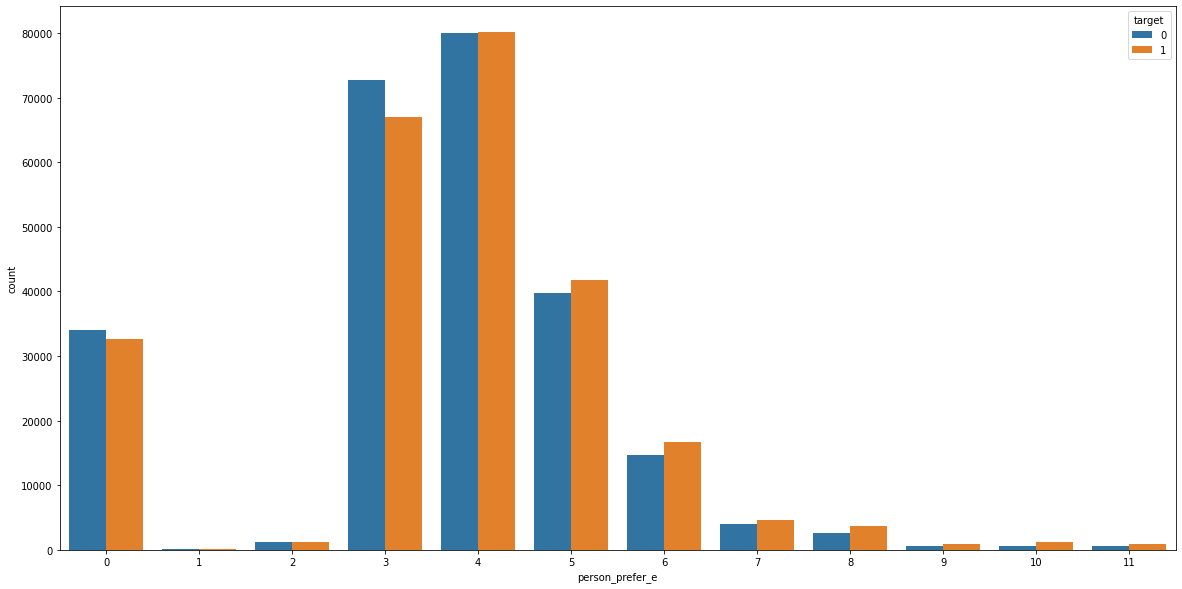

In [42]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_e', hue = 'target')


## 회원 선호 속성 F

의미가 크지 않을 거 같다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

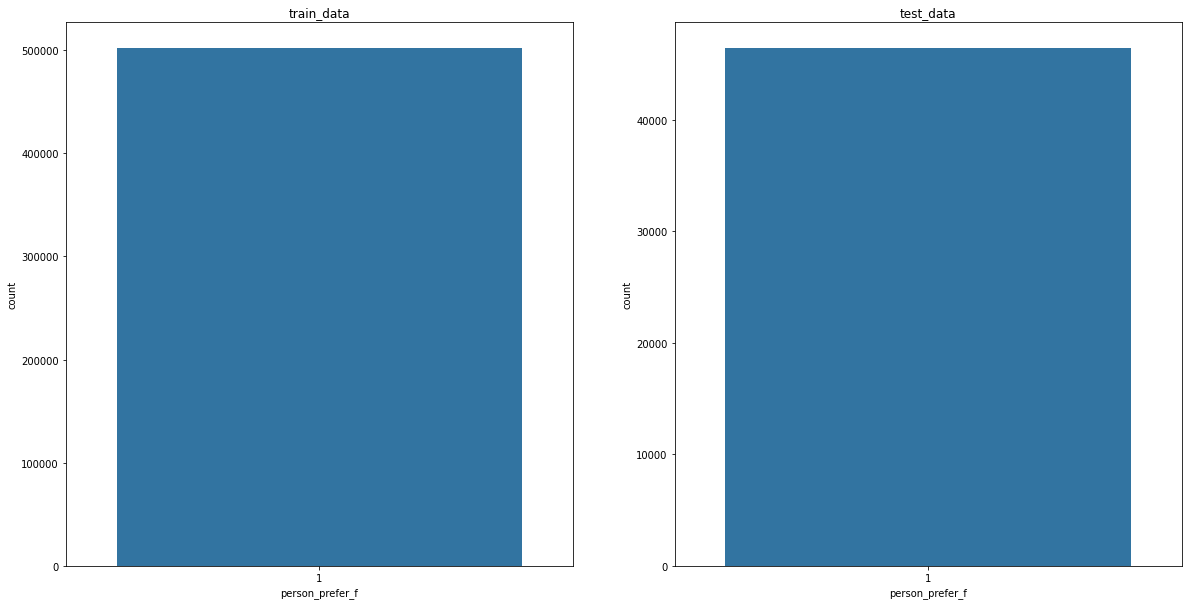

In [43]:
# person_prefer_f
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_f'], ax = ax[0])
sns.countplot(test_data['person_prefer_f'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

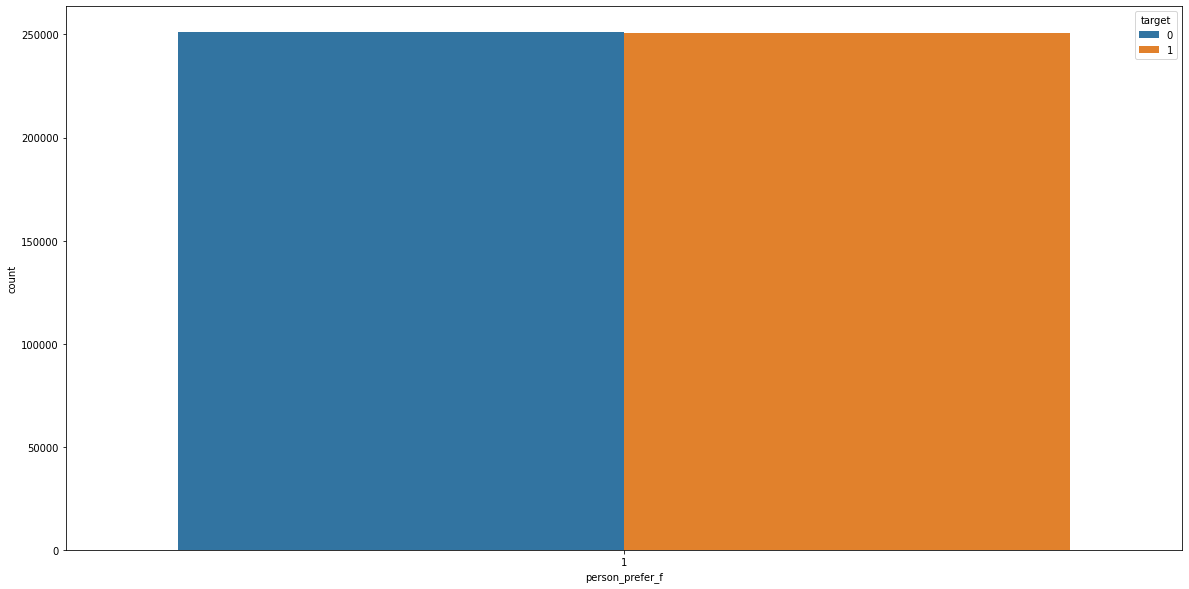

In [44]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_f', hue = 'target')

## 회원 선호 속성 G

의미가 크지 않을거 같다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

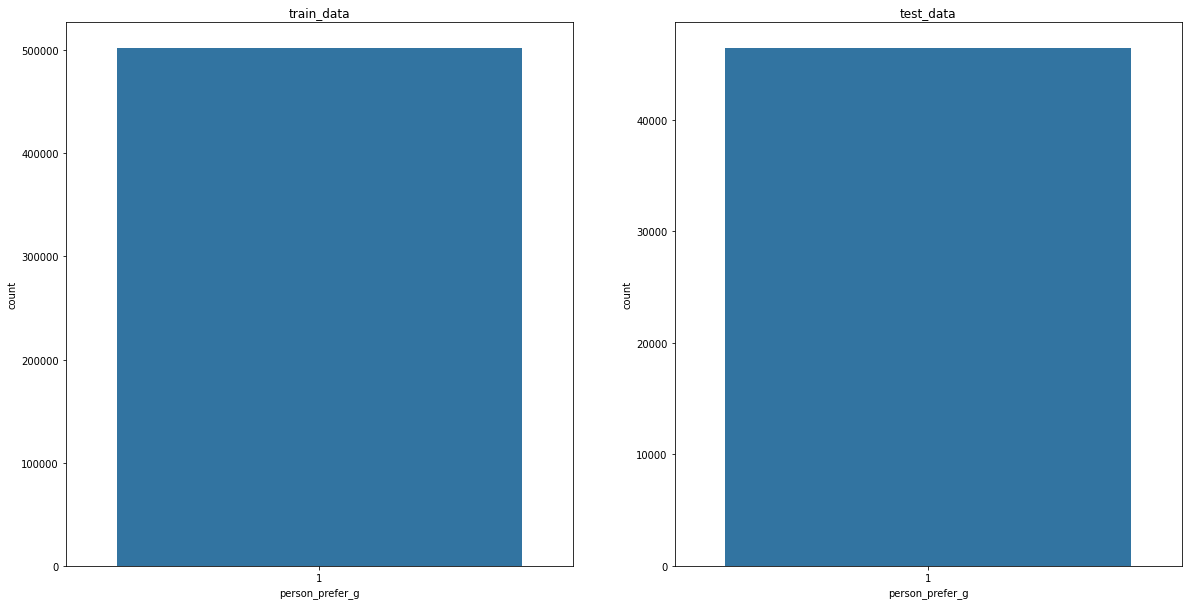

In [45]:
# person_prefer_g
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_g'], ax = ax[0])
sns.countplot(test_data['person_prefer_g'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

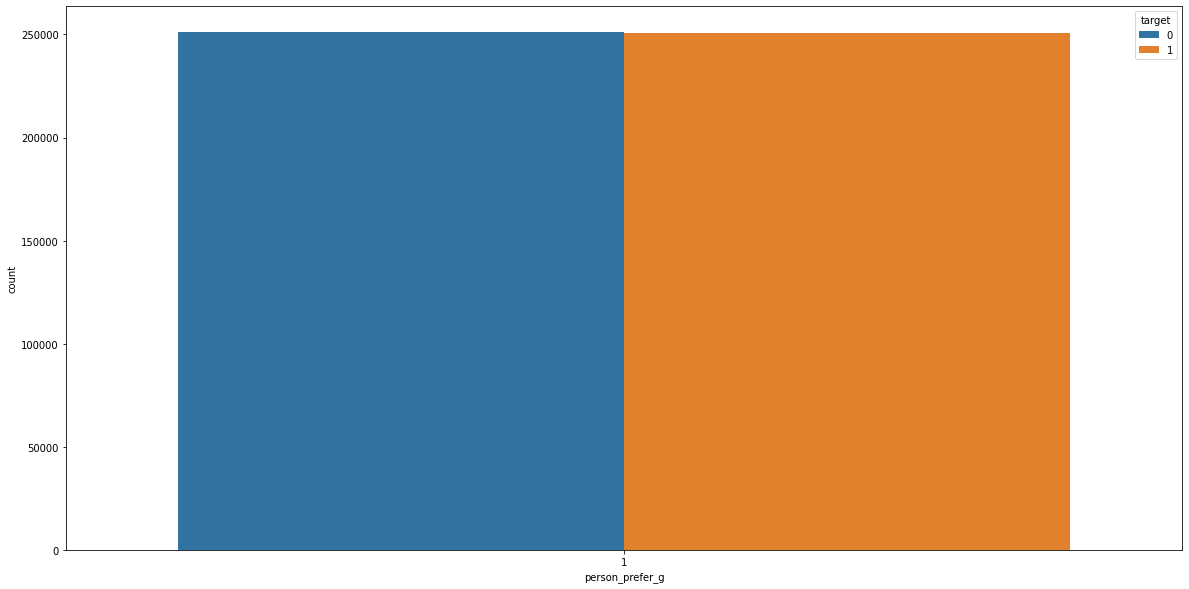

In [46]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_g', hue = 'target')

## 회원 선호 속성 H

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

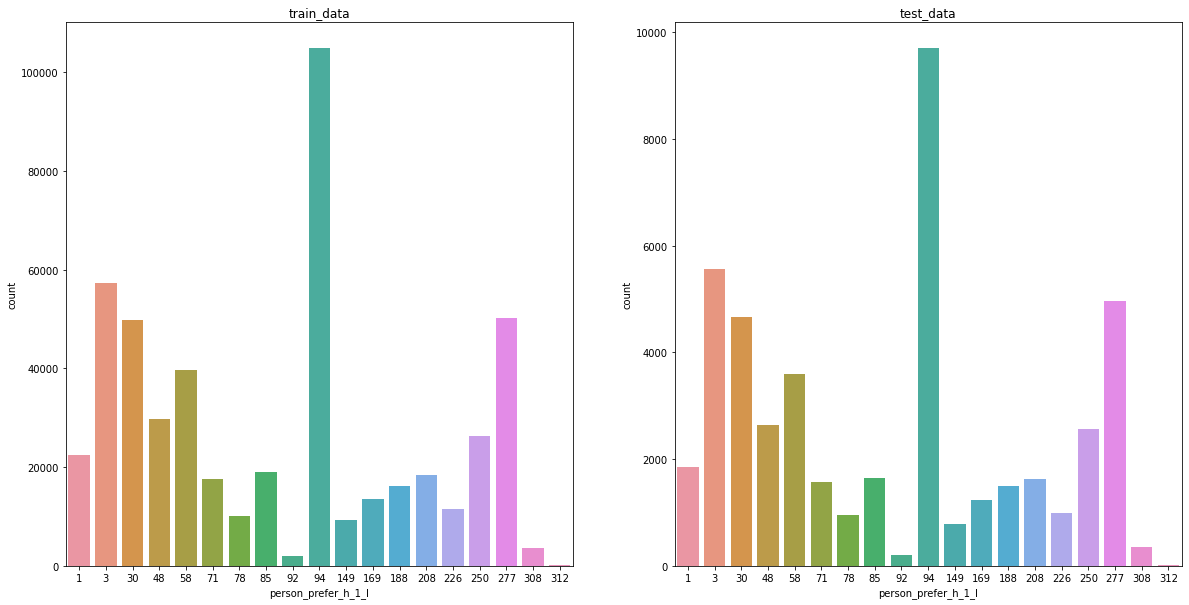

In [47]:
# person_prefer_h_1_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_1_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_1_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

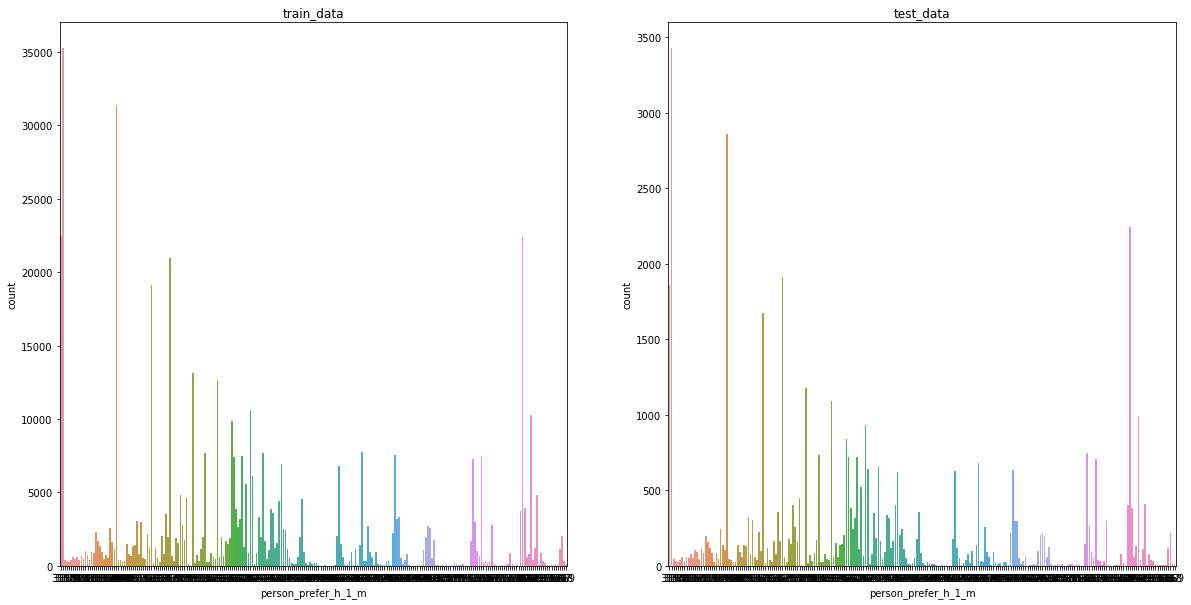

In [48]:
# person_prefer_h_1_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_1_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_1_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

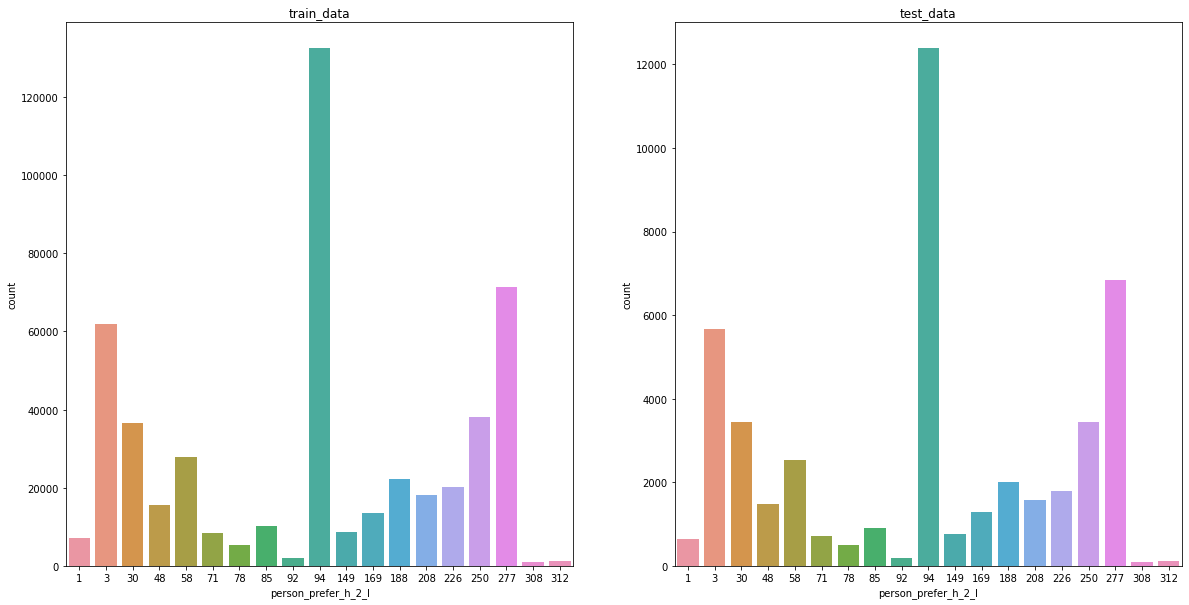

In [49]:
# person_prefer_h_2_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_2_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_2_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

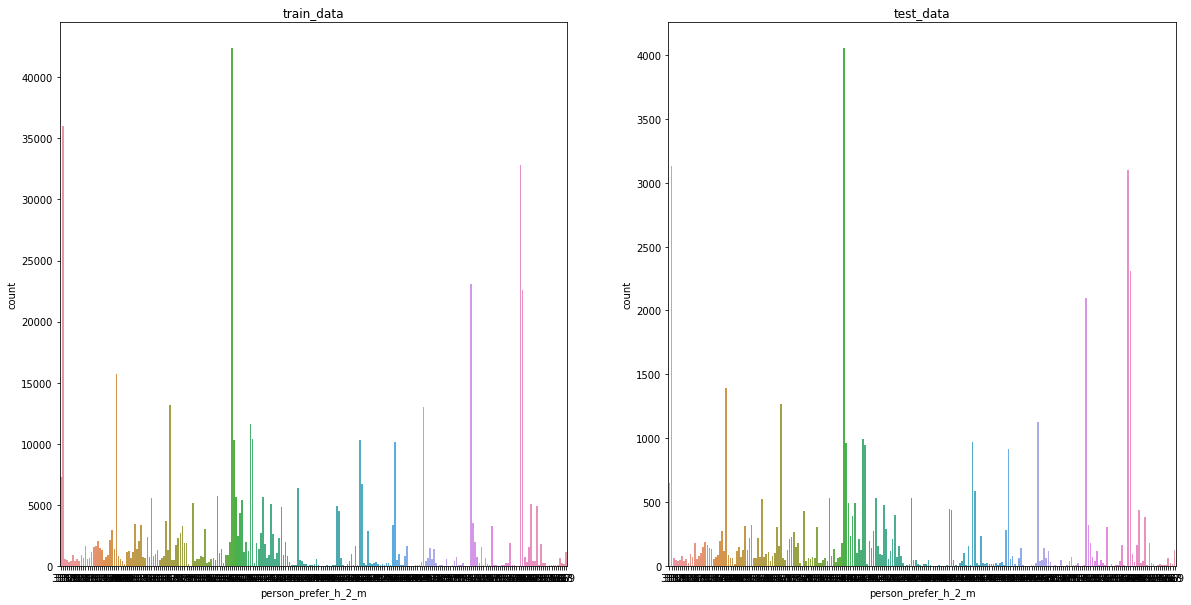

In [50]:
# person_prefer_h_2_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_2_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_2_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

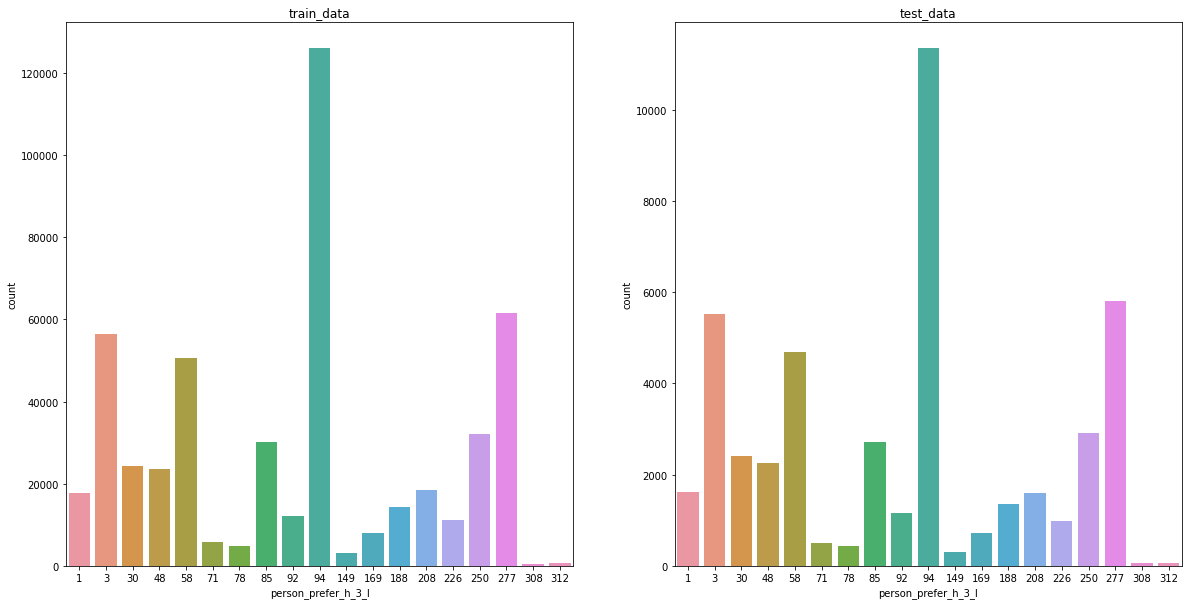

In [51]:
# person_prefer_h_3_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_3_l'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_3_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

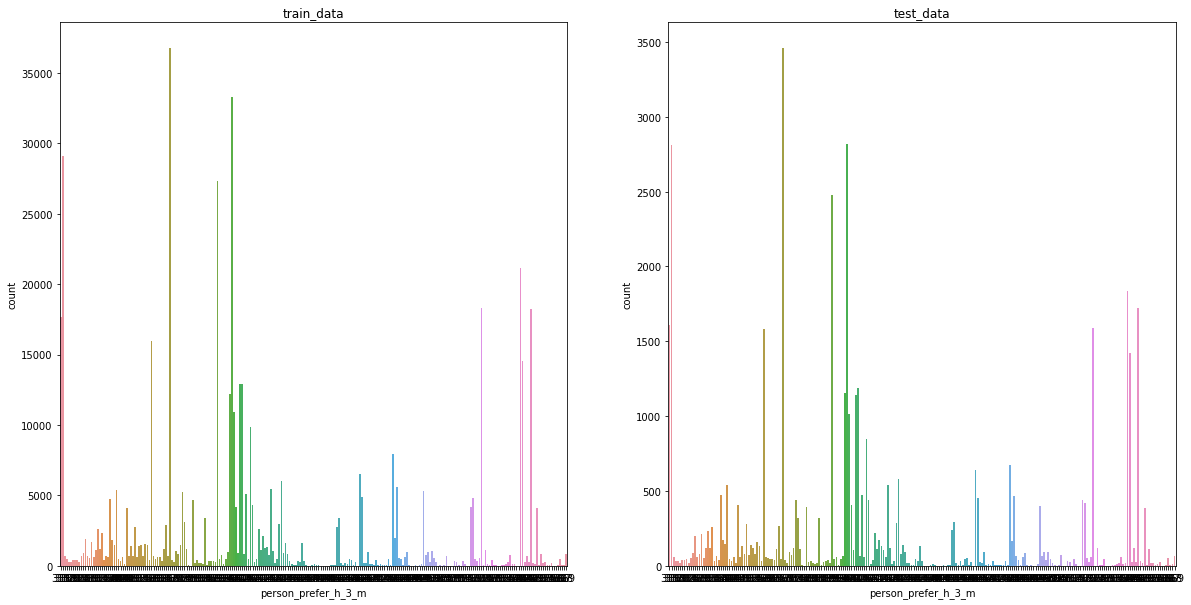

In [52]:
# person_prefer_h_3_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['person_prefer_h_3_m'], ax = ax[0])
sns.countplot(test_data['person_prefer_h_3_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

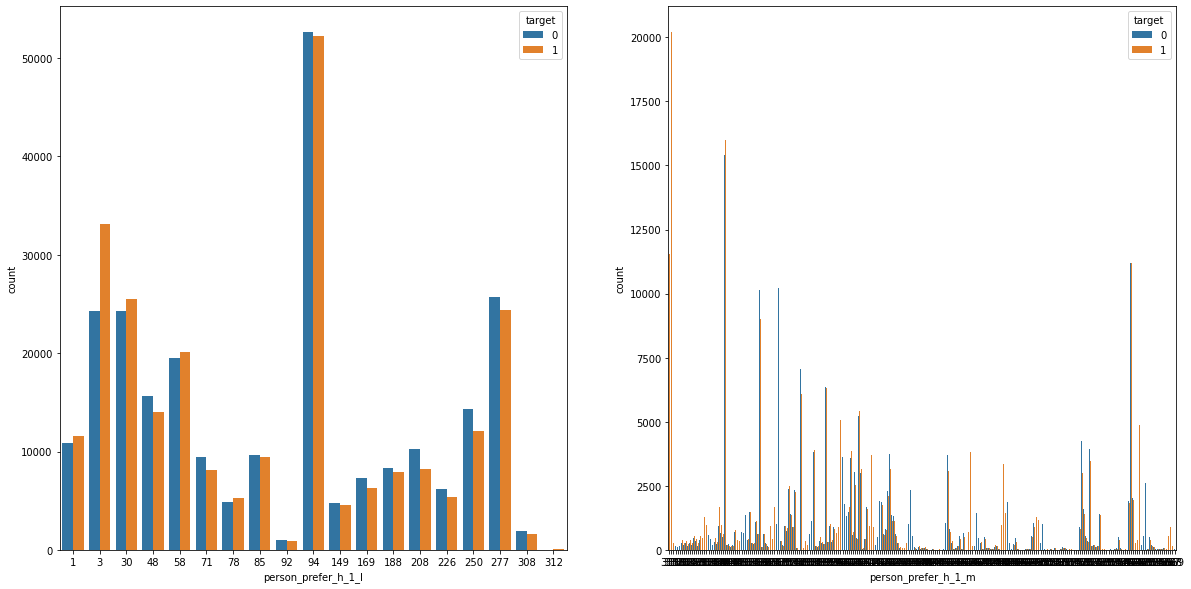

In [53]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_1_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_1_m', hue = 'target', ax = ax[1])

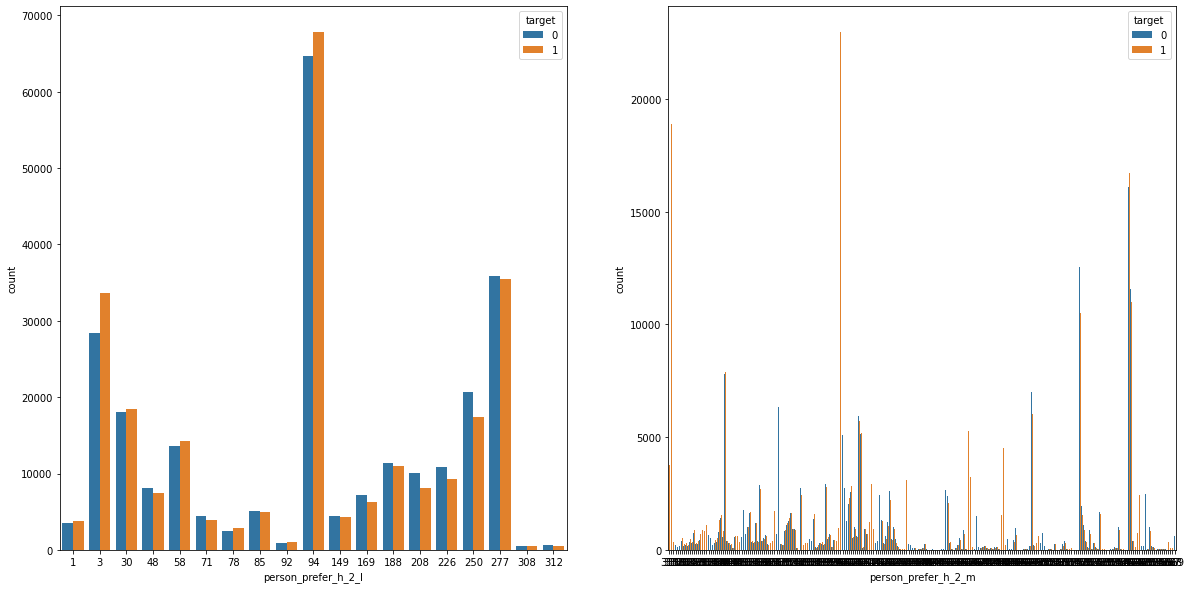

In [54]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_2_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_2_m', hue = 'target', ax = ax[1])

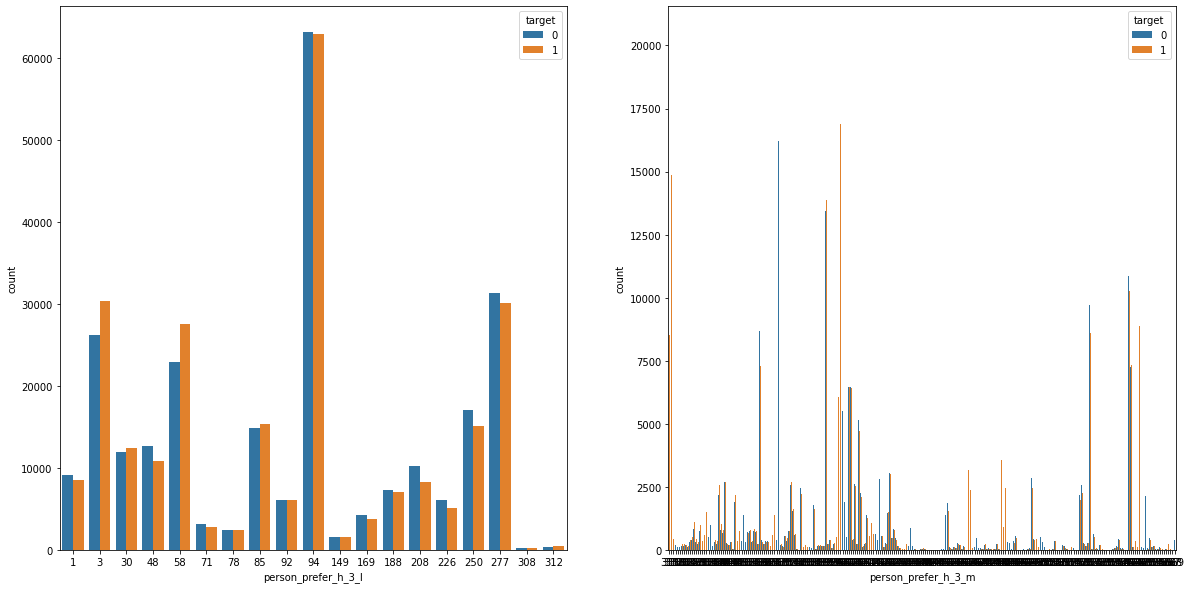

In [55]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'person_prefer_h_3_l', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'person_prefer_h_3_m', hue = 'target', ax = ax[1])

## 컨텐츠 속성 I

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

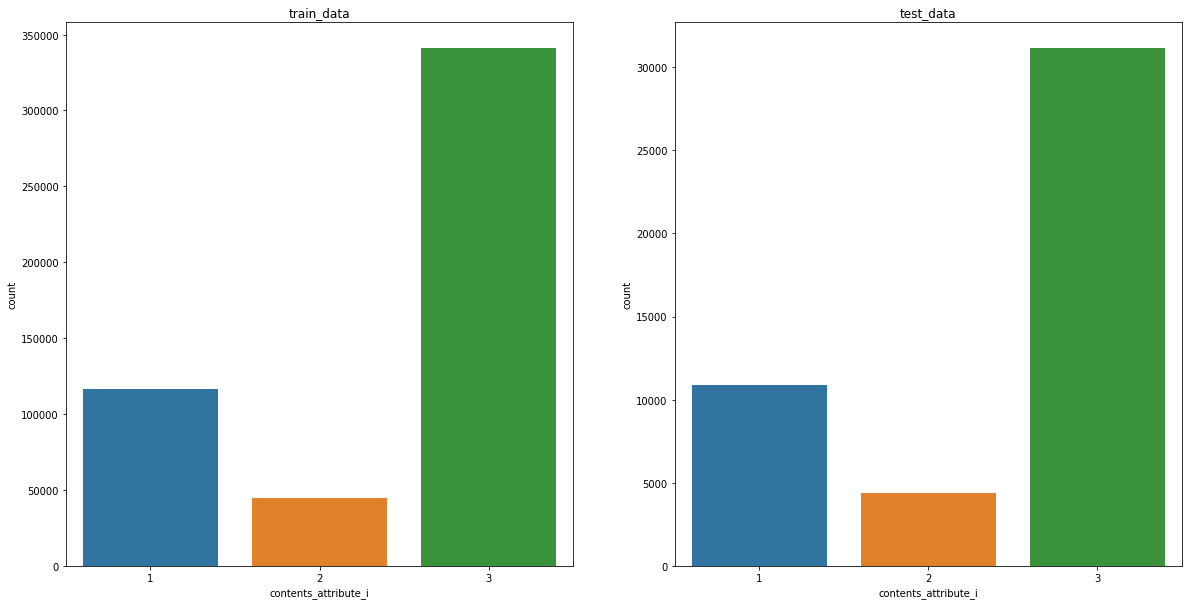

In [56]:
# contents_attribute_i
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_i'], ax = ax[0])
sns.countplot(test_data['contents_attribute_i'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

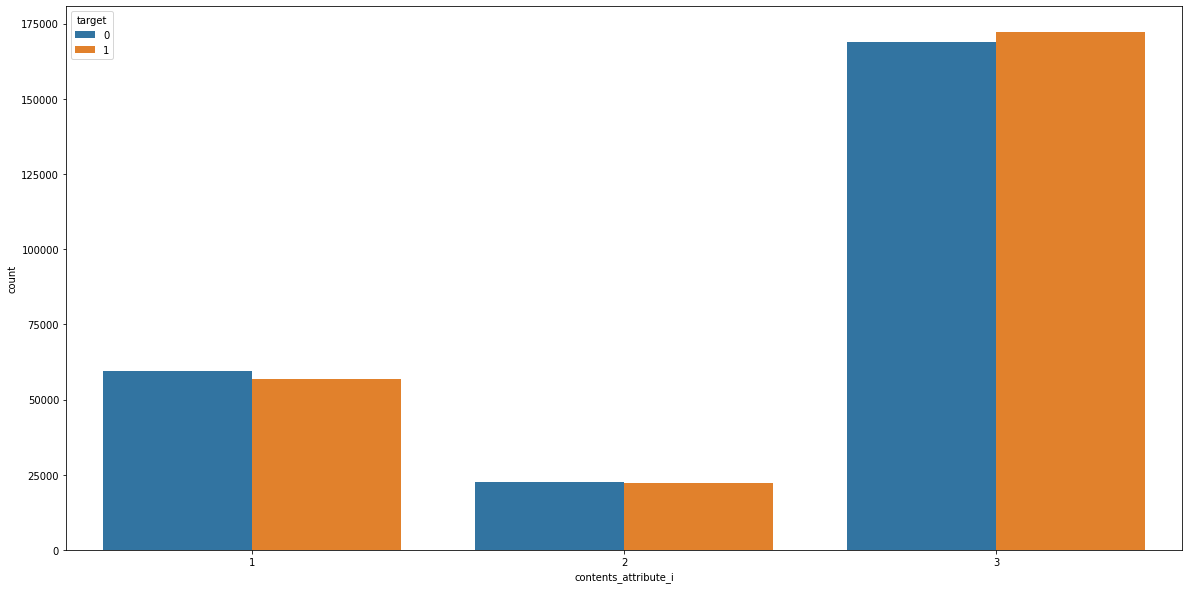

In [57]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_i', hue = 'target')

## 컨텐츠 속성 A

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

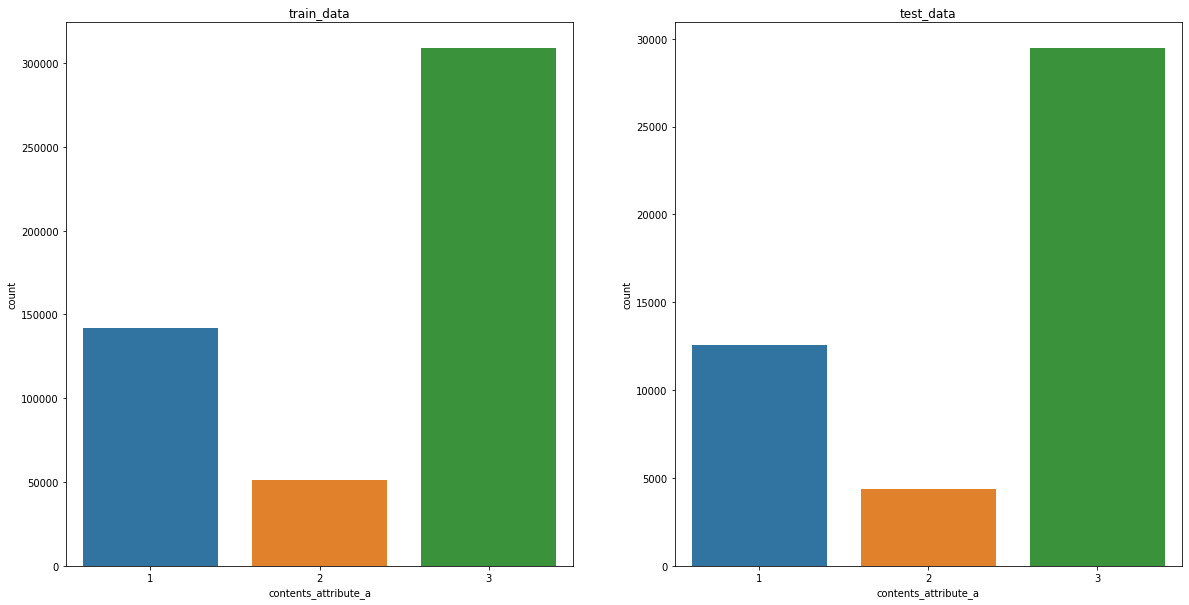

In [58]:
# contents_attribute_a
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_a'], ax = ax[0])
sns.countplot(test_data['contents_attribute_a'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

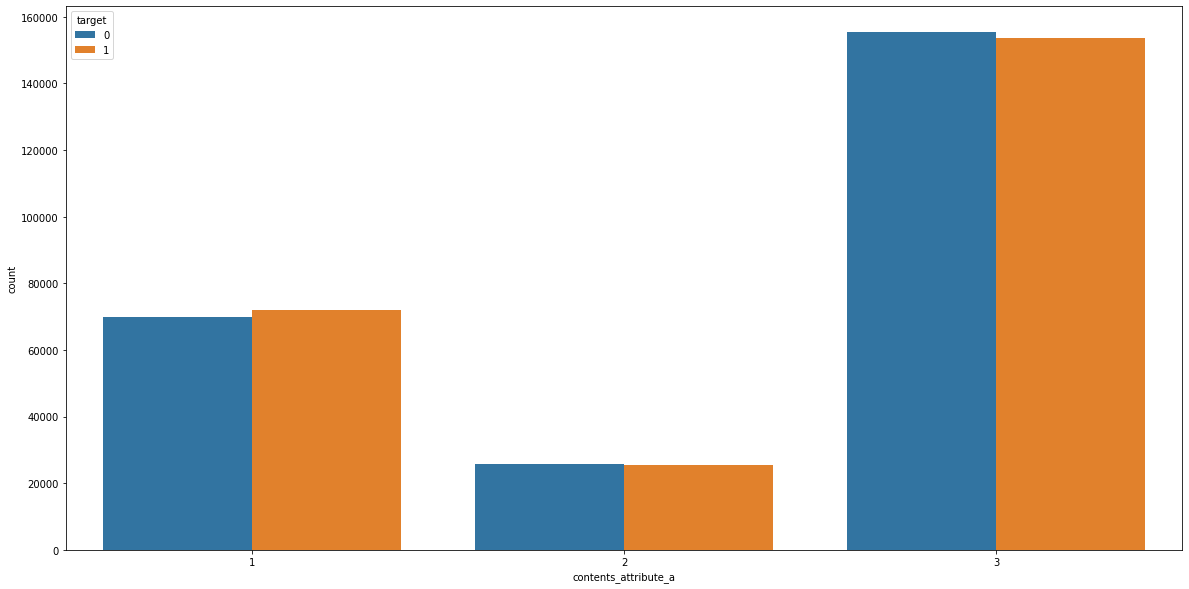

In [59]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_a', hue = 'target')

## 컨텐츠 속성 J

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

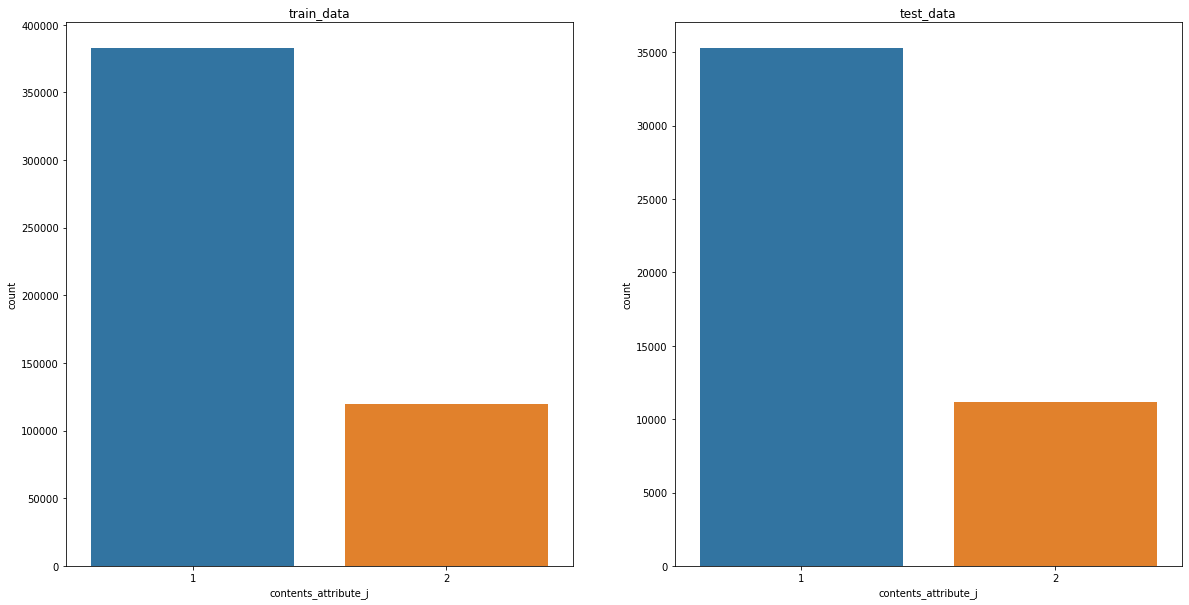

In [60]:
# contents_attribute_j
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_j'], ax = ax[0])
sns.countplot(test_data['contents_attribute_j'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

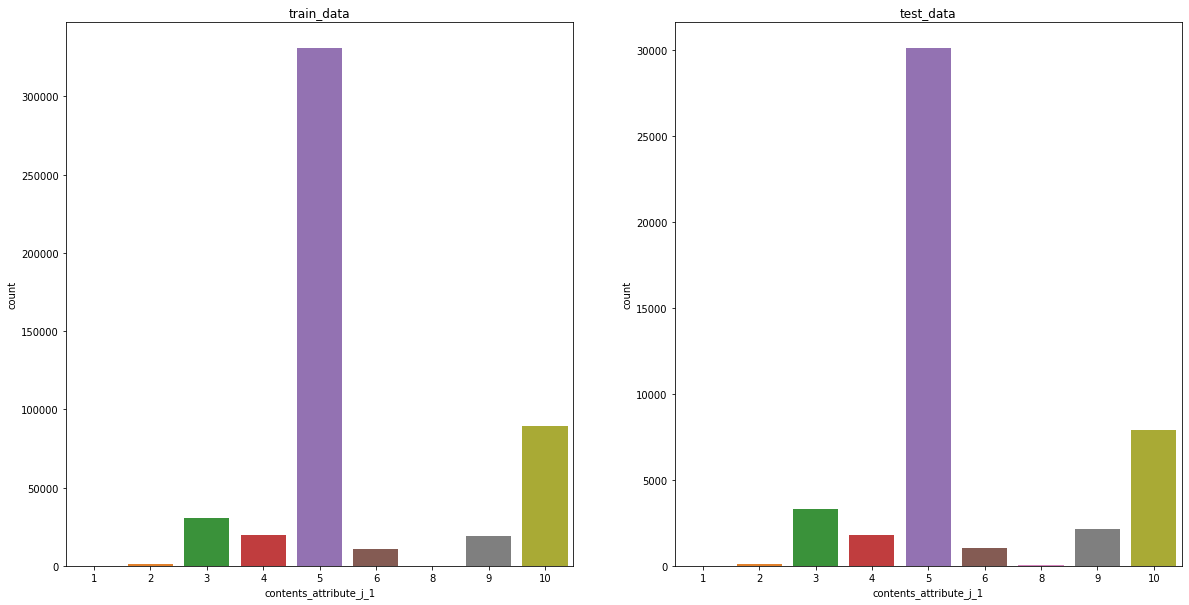

In [61]:
# contents_attribute_j
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_j_1'], ax = ax[0])
sns.countplot(test_data['contents_attribute_j_1'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

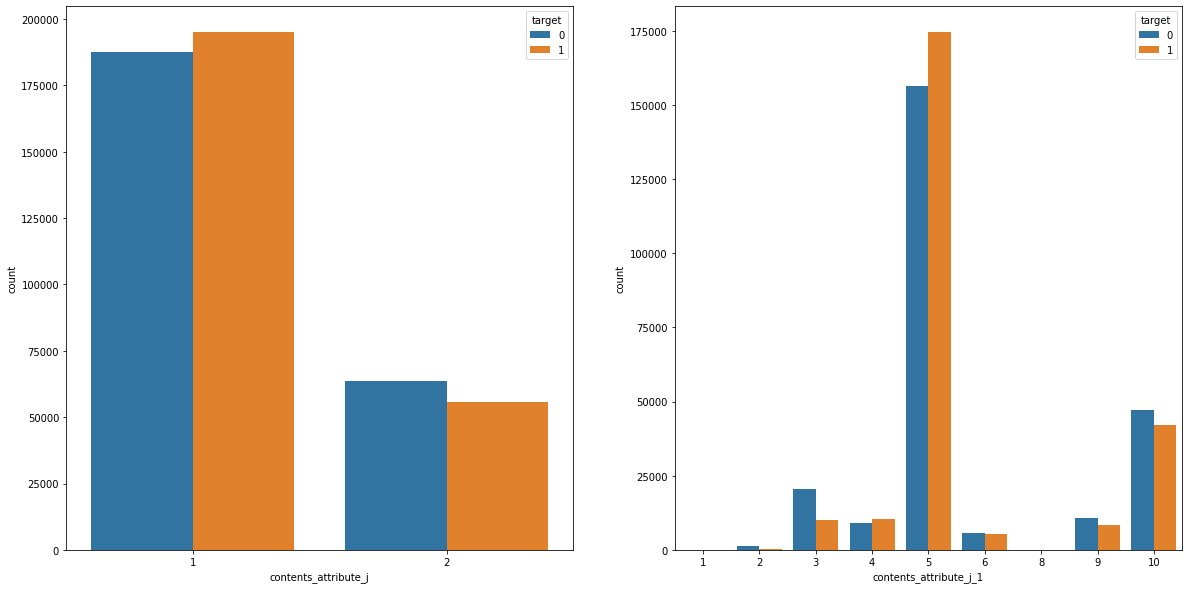

In [62]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_j', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_j_1', hue = 'target', ax = ax[1])

## 컨텐츠 속성 C

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

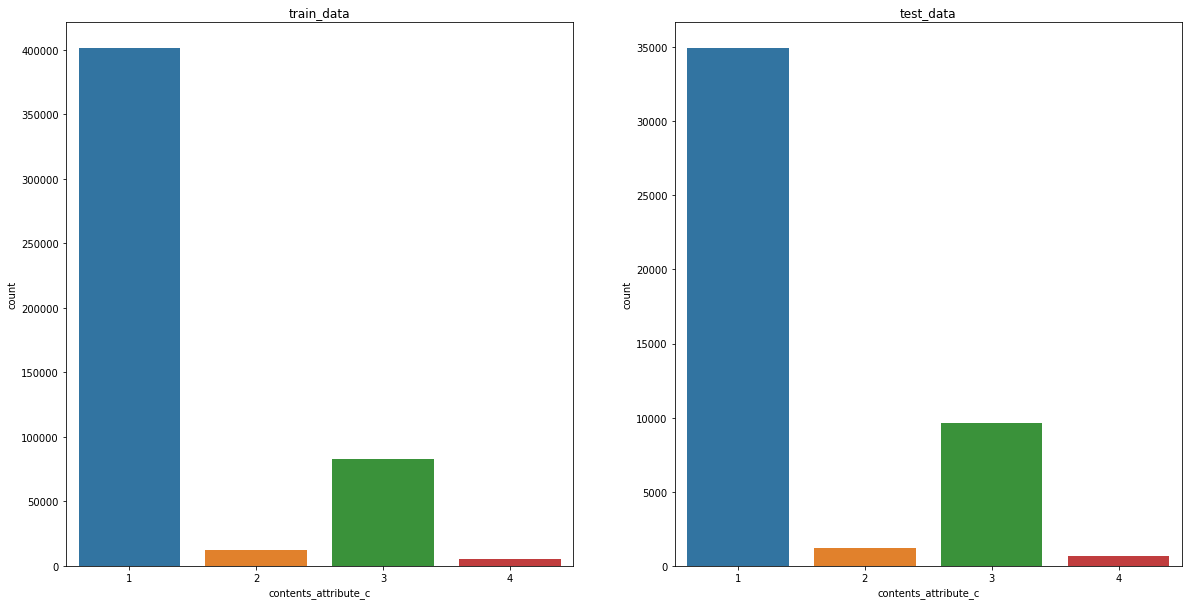

In [63]:
# contents_attribute_k
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_c'], ax = ax[0])
sns.countplot(test_data['contents_attribute_c'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

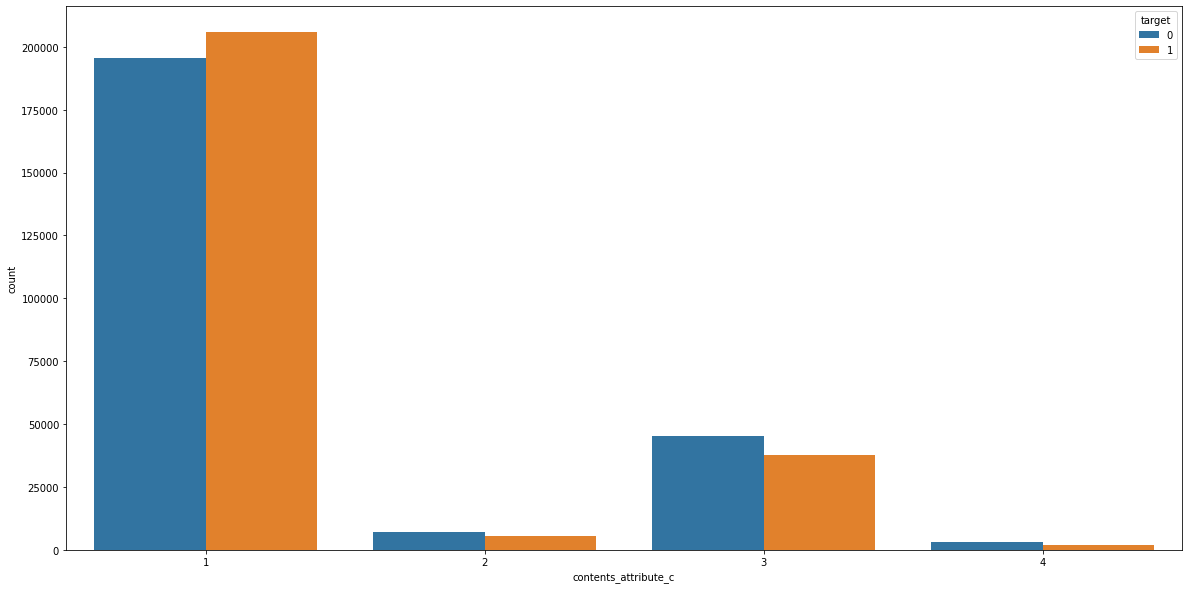

In [64]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_c', hue = 'target')


## 컨텐츠 속성 K

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

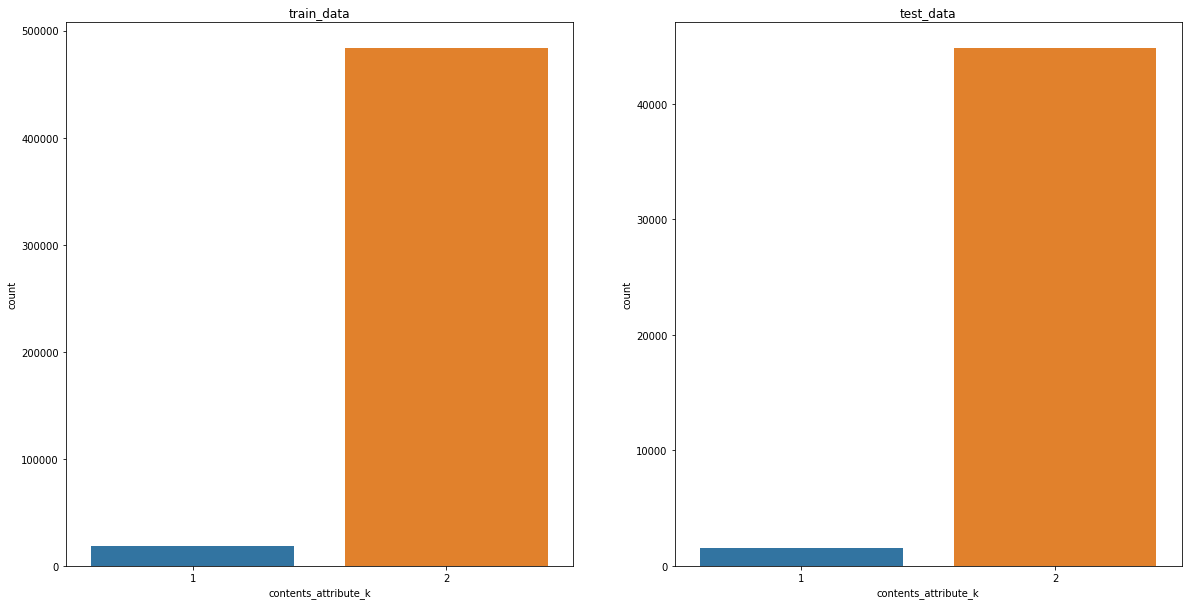

In [65]:
# contents_attribute_k
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_k'], ax = ax[0])
sns.countplot(test_data['contents_attribute_k'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

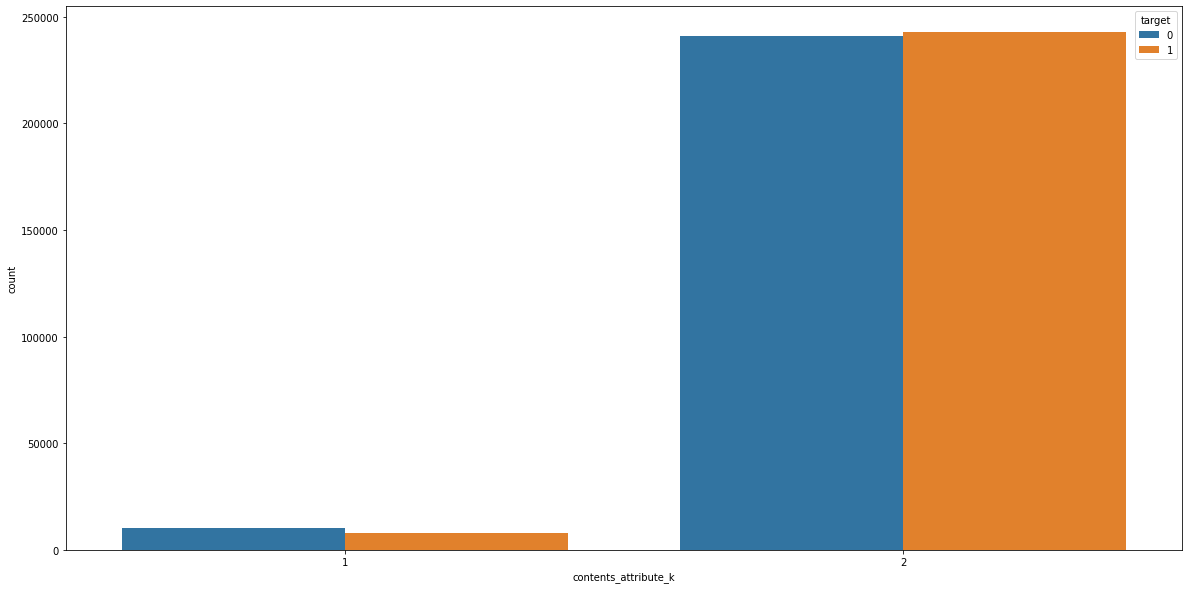

In [66]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_k', hue = 'target')

##컨텐츠 속성 L

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

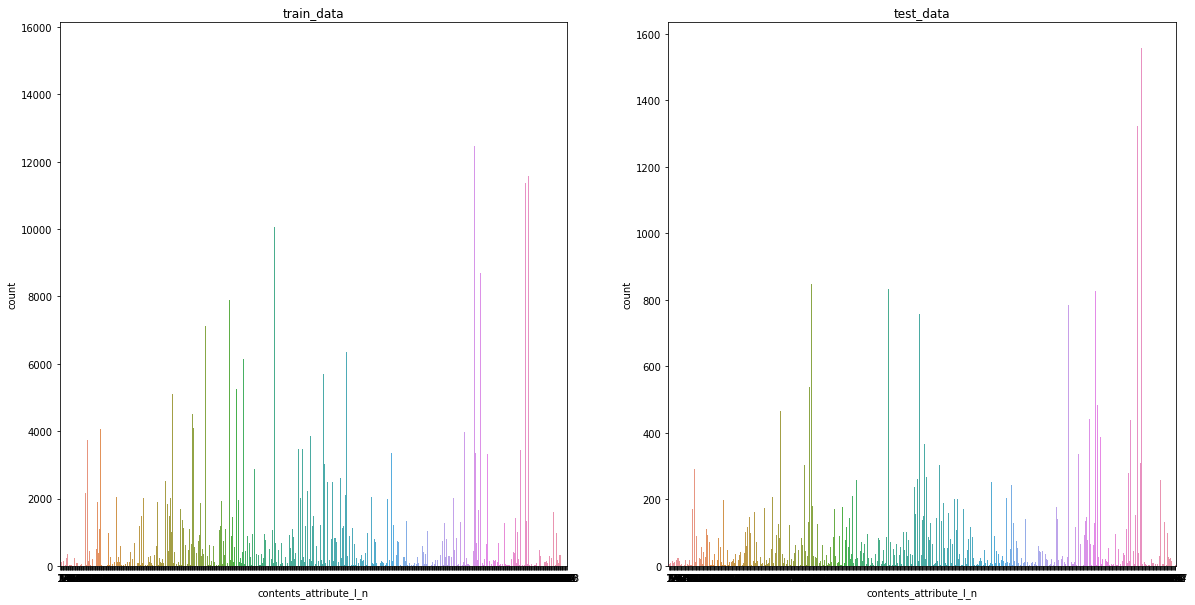

In [67]:
# contents_attribute_l_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_n'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

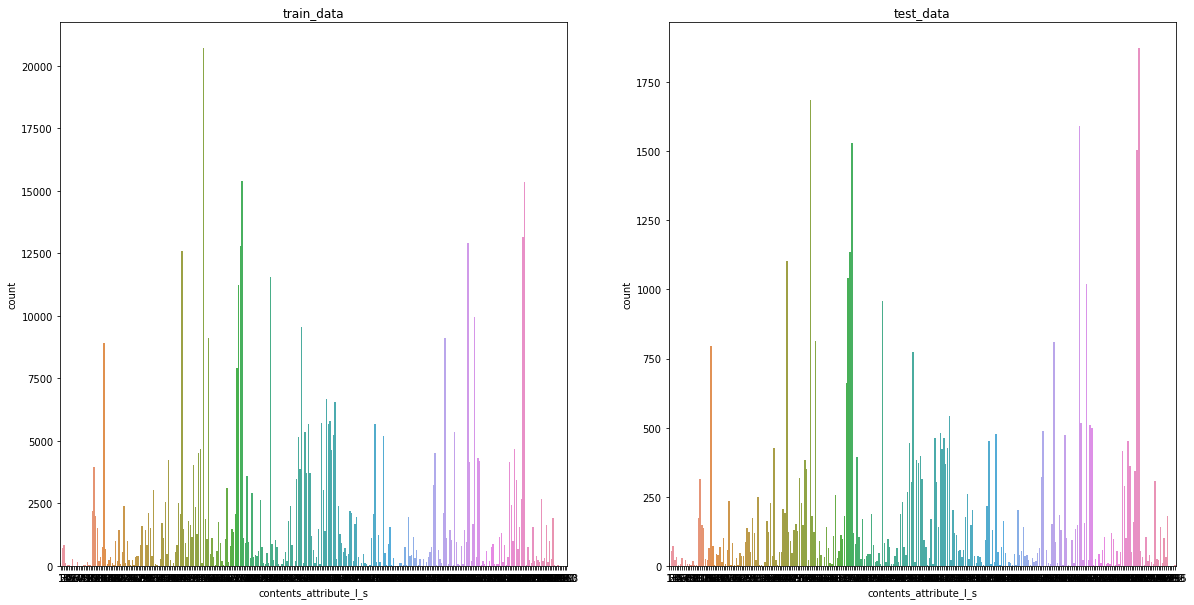

In [68]:
# contents_attribute_l_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_s'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

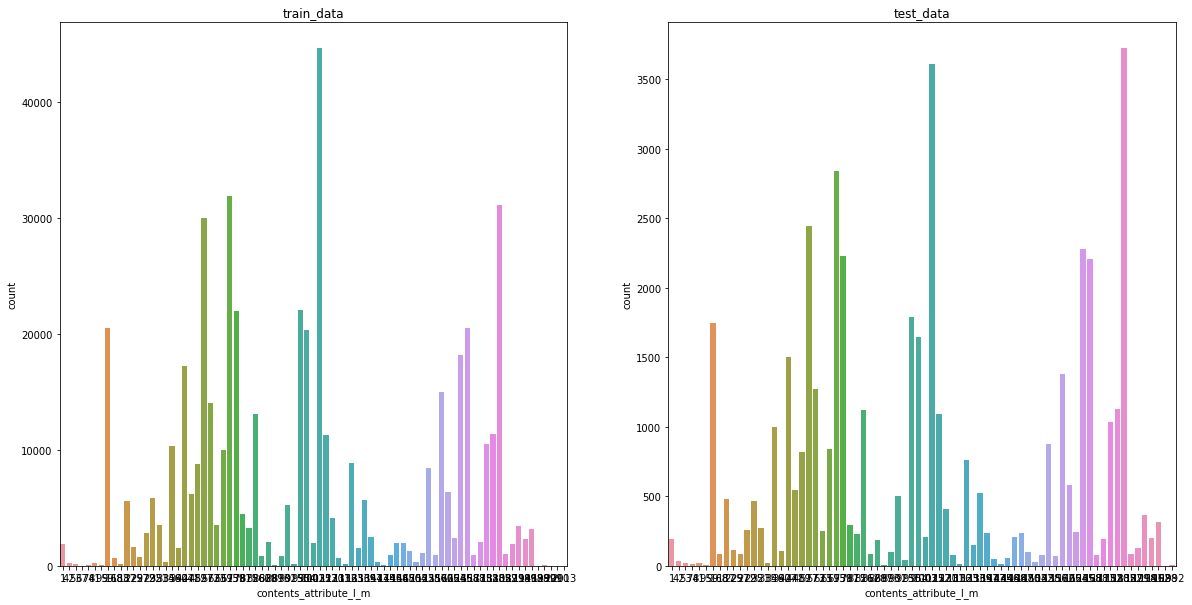

In [69]:
# contents_attribute_l_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

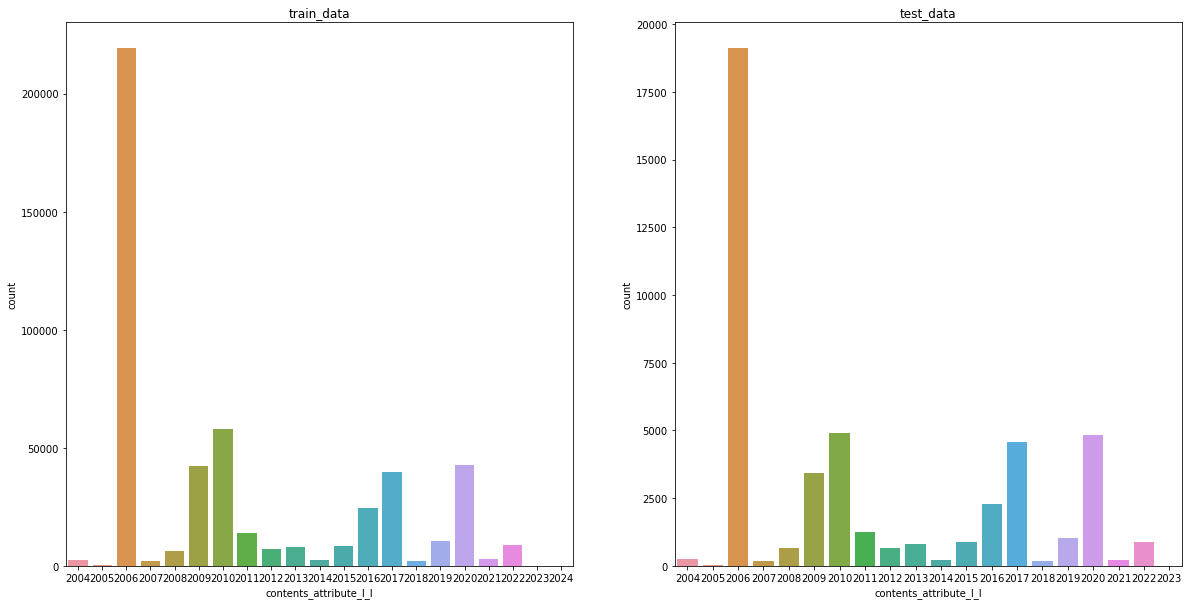

In [70]:
# contents_attribute_l_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_l_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_l_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

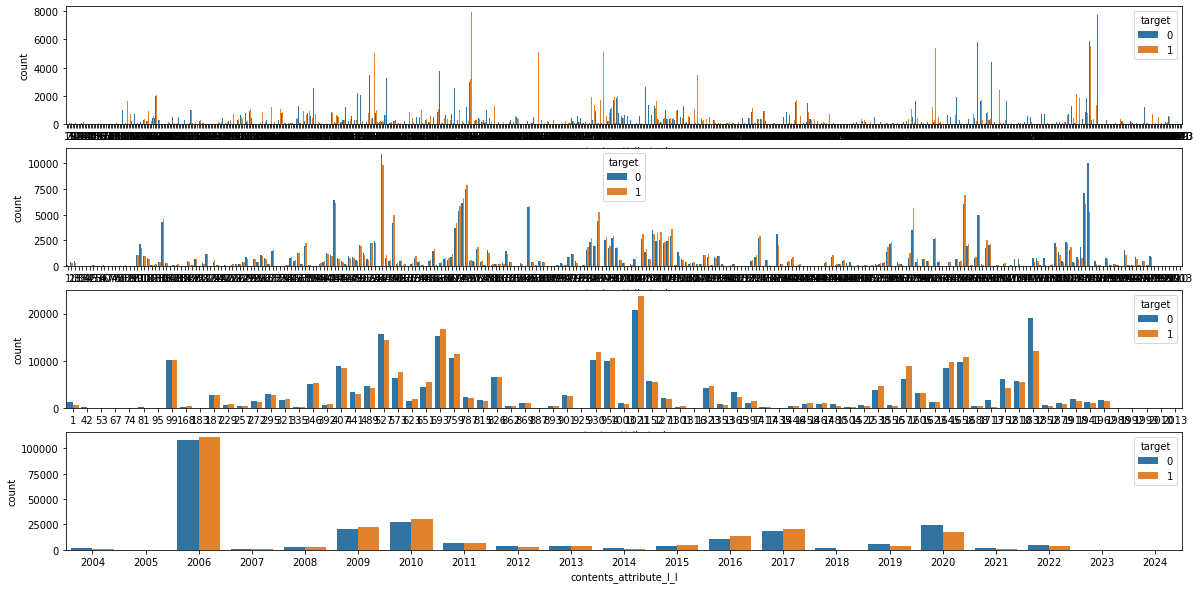

In [71]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_l_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_l_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'contents_attribute_l_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'contents_attribute_l_l', hue = 'target', ax = ax[3])

## 컨텐츠 속성 D

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

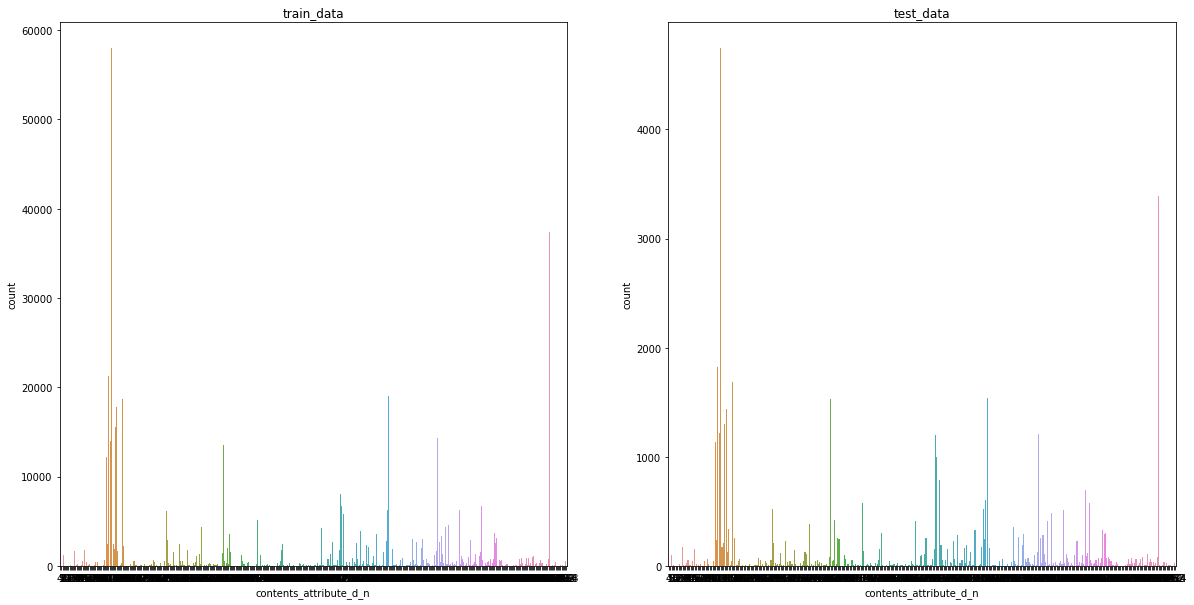

In [72]:
# contents_attribute_d_n
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_n'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_n'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

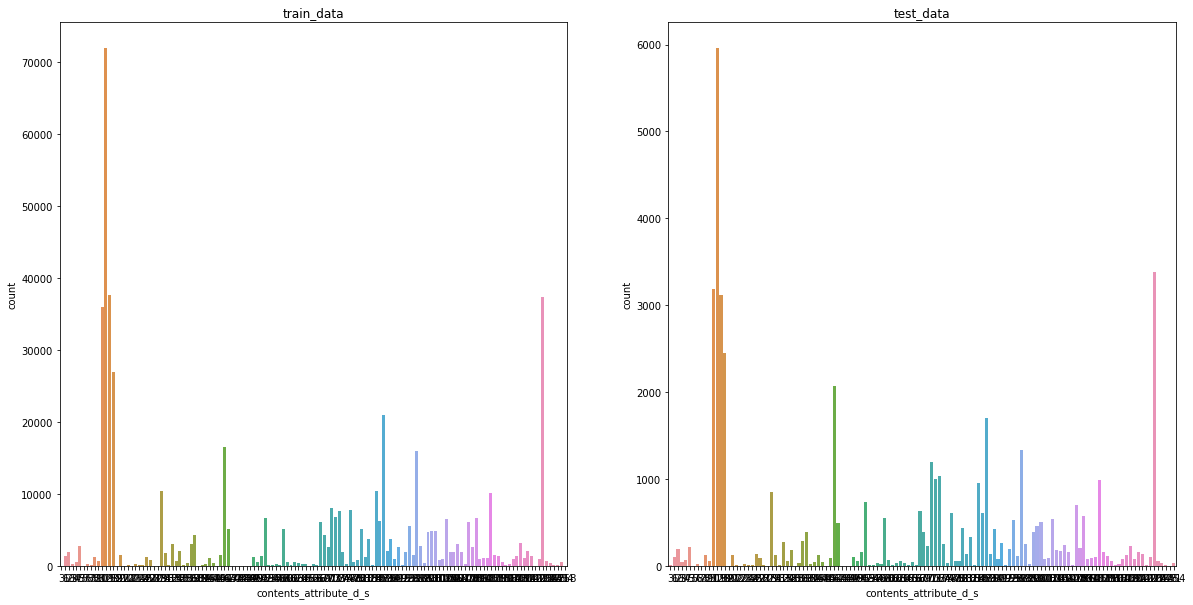

In [73]:
# contents_attribute_d_s
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_s'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_s'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

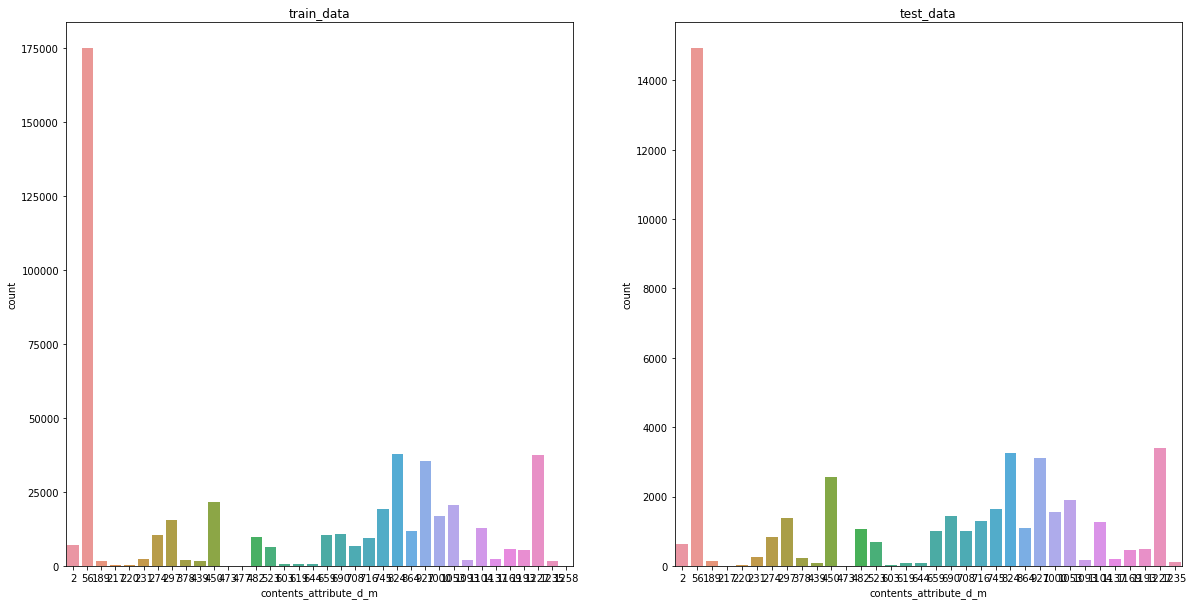

In [74]:
# contents_attribute_d_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

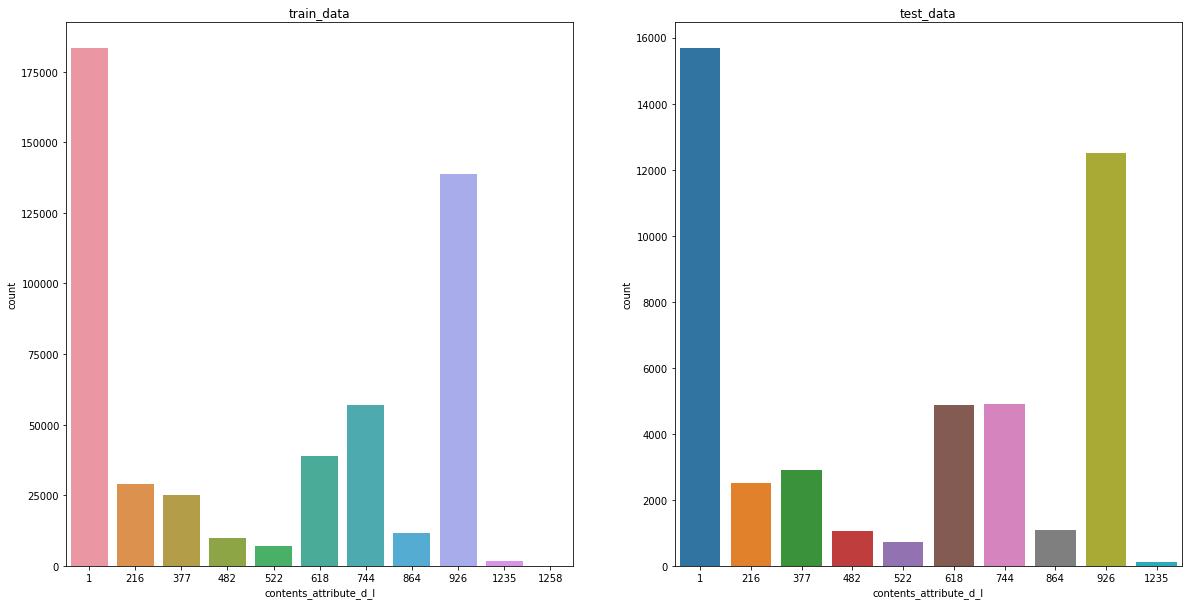

In [75]:
# contents_attribute_d_l
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_d_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_d_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

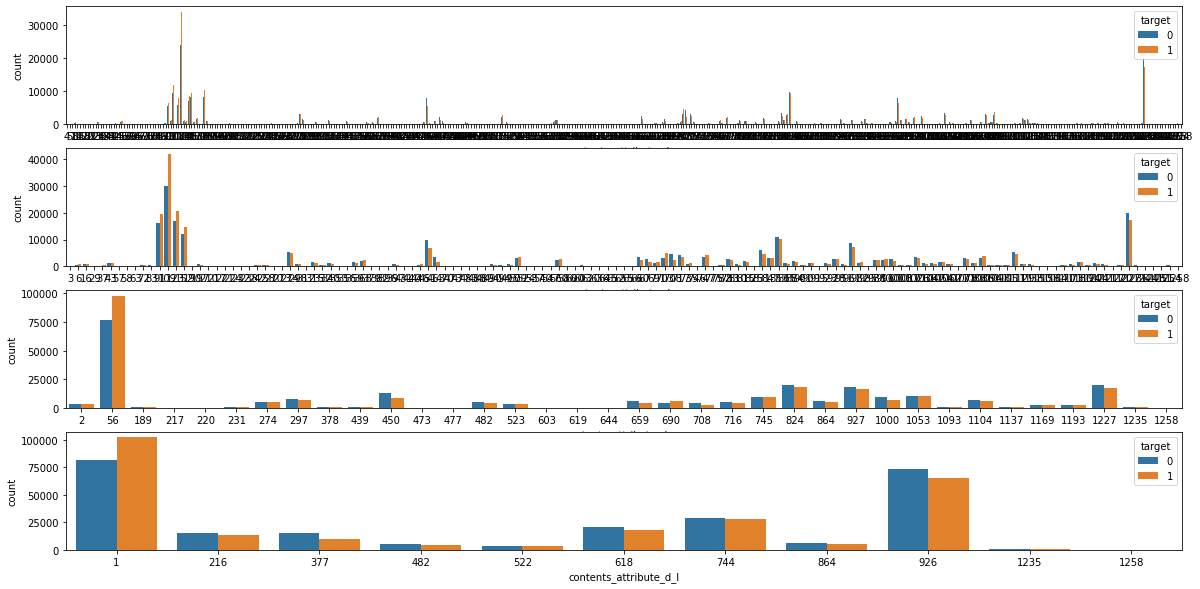

In [76]:
fig, ax = plt.subplots(nrows = 4, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_d_n', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_d_s', hue = 'target', ax = ax[1])
sns.countplot(data = train_data, x = 'contents_attribute_d_m', hue = 'target', ax = ax[2])
sns.countplot(data = train_data, x = 'contents_attribute_d_l', hue = 'target', ax = ax[3])

## 컨텐츠 속성 M

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

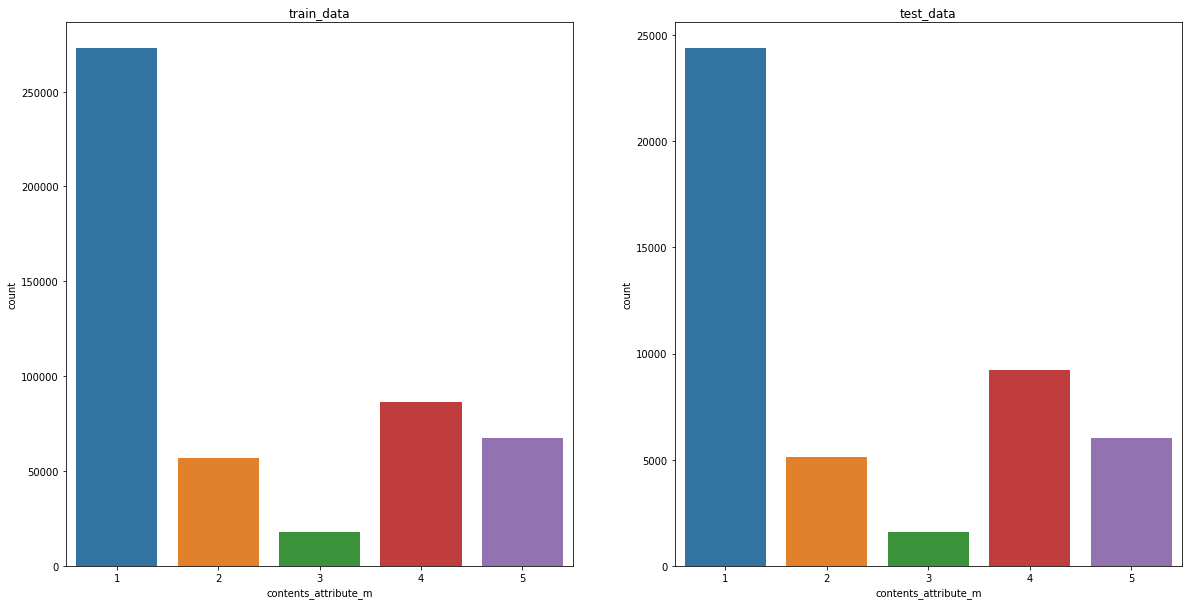

In [77]:
# contents_attribute_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

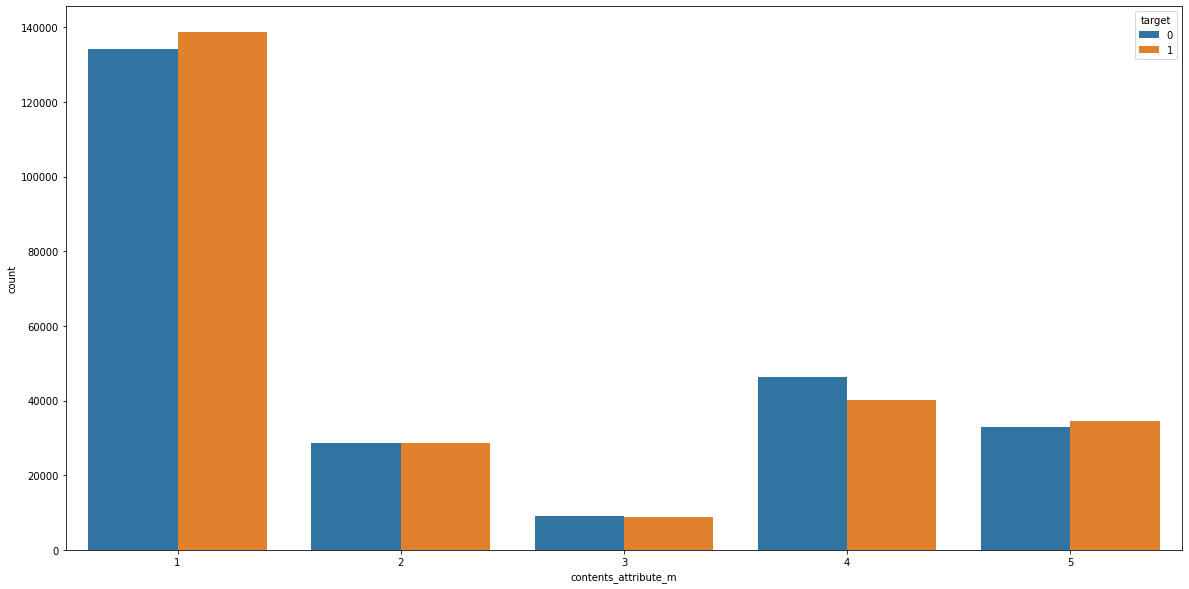

In [78]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_m', hue = 'target')

## 컨텐츠 속성 E

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

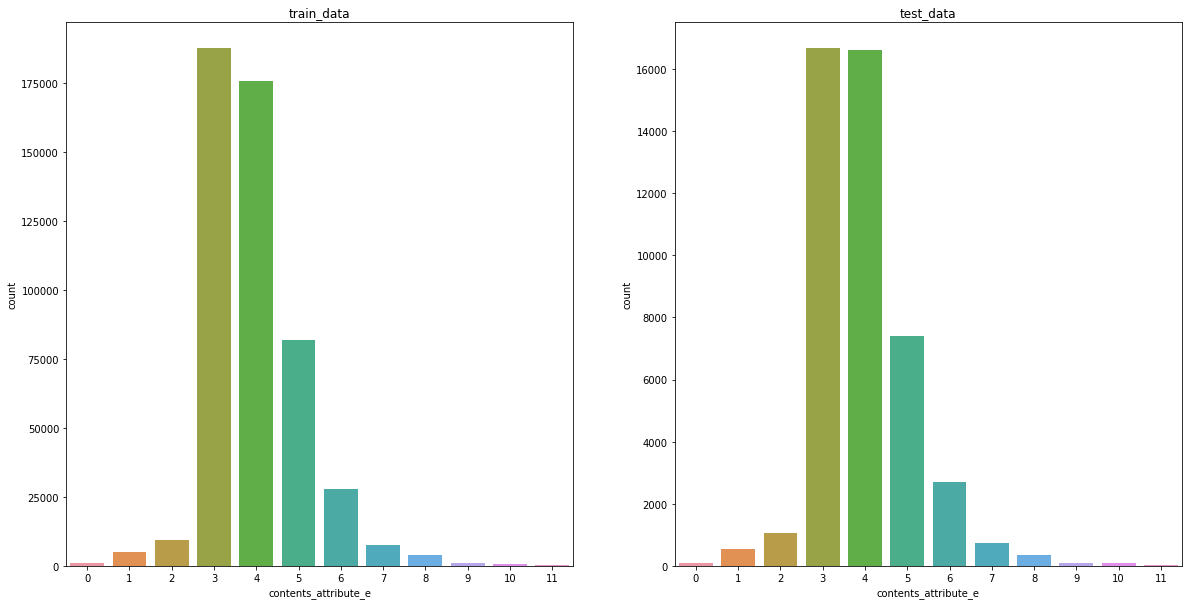

In [79]:
# contents_attribute_e
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_e'], ax = ax[0])
sns.countplot(test_data['contents_attribute_e'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

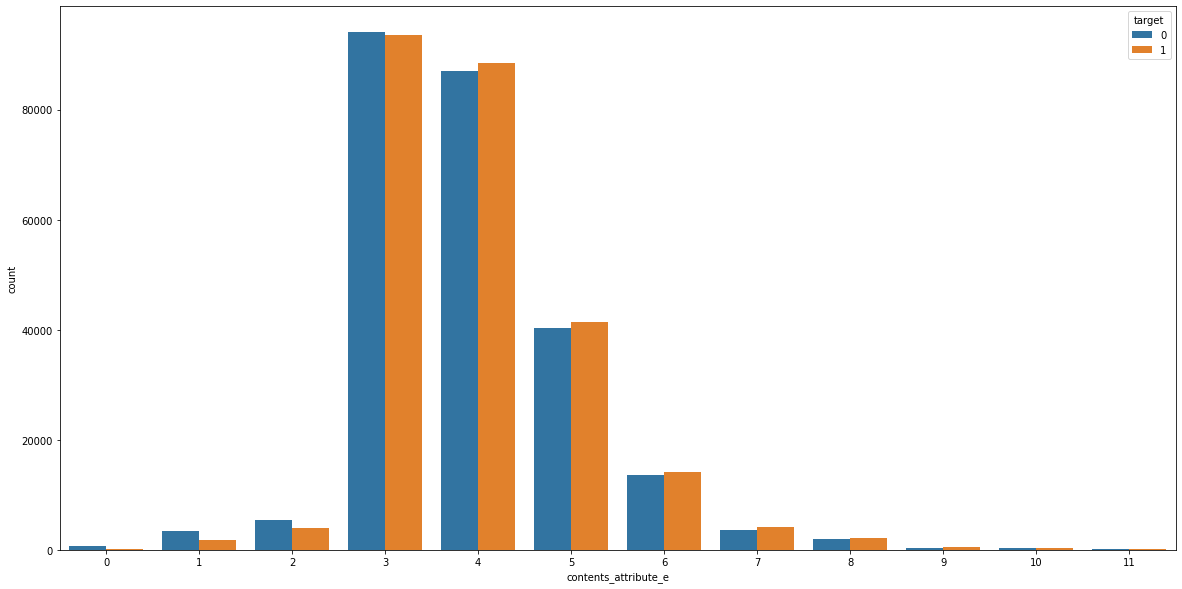

In [80]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_e', hue = 'target')

## 컨텐츠 속성 H

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

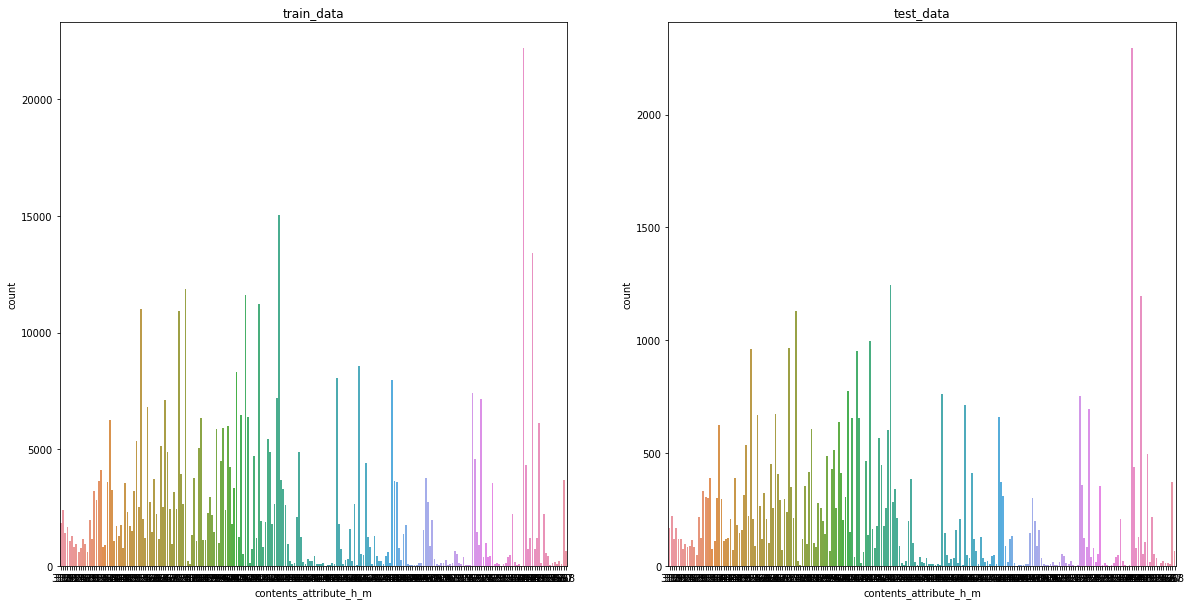

In [81]:
# contents_attribute_h_m
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_h_m'], ax = ax[0])
sns.countplot(test_data['contents_attribute_h_m'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'test_data')

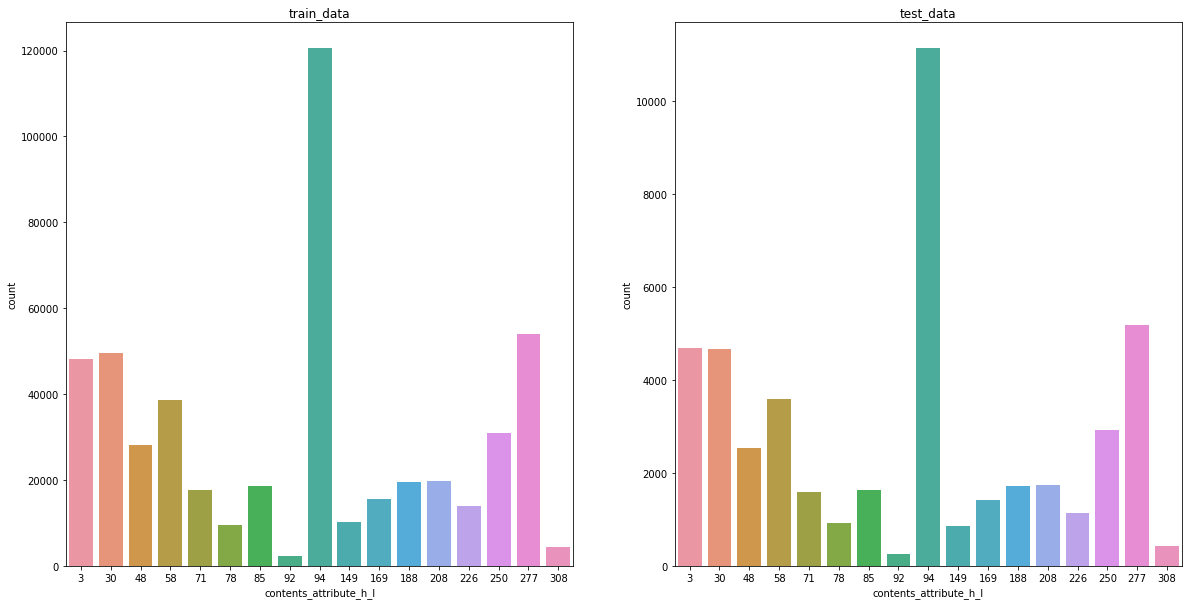

In [82]:
# contents_attribute_h_l

fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))

sns.countplot(train_data['contents_attribute_h_l'], ax = ax[0])
sns.countplot(test_data['contents_attribute_h_l'], ax = ax[1])

ax[0].set_title('train_data')
ax[1].set_title('test_data')

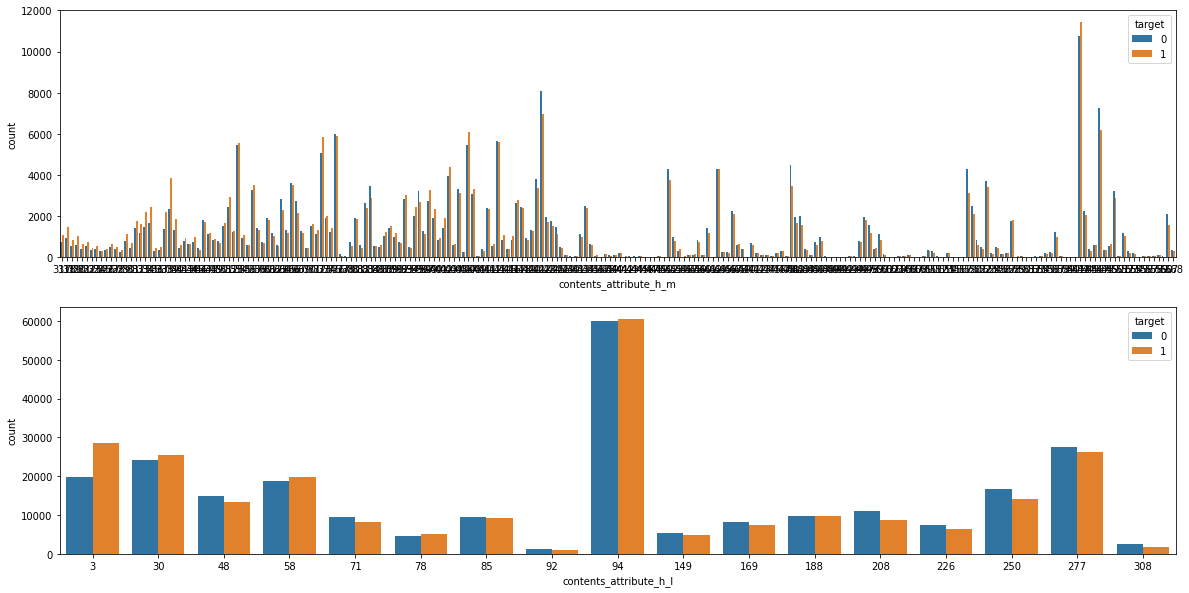

In [83]:
fig, ax = plt.subplots(nrows = 2, figsize = (20,10))
sns.countplot(data = train_data, x = 'contents_attribute_h_m', hue = 'target', ax = ax[0])
sns.countplot(data = train_data, x = 'contents_attribute_h_l', hue = 'target', ax = ax[1])

전체적으로 target을 선택한 비율은 비슷비슷 하다.

train 데이터와 test 데이터 비율도 비슷비슷 하다.

# 컨텐츠 열람 일시

In [84]:
data['month']=data['contents_open_dt'].dt.strftime("%m")
data['date']=data['contents_open_dt'].dt.strftime("%d")
data['hour']=data['contents_open_dt'].dt.strftime("%H")
data['day']=data['contents_open_dt'].dt.strftime("%A")

data['month']=data['month'].astype(int)
data['date']=data['date'].astype(int)
data['hour']=data['hour'].astype(int)

In [85]:
month = data.groupby('month')['target'].sum().reset_index()
date = data.groupby('date')['target'].sum().reset_index()
hour = data.groupby('hour')['target'].sum().reset_index()
day = data.groupby('day')['target'].sum().reset_index()

In [86]:
month

month  target
0       1   22362
1       2   24623
2       3   24406
3       4   21690
4       5   21416
5       6   23790
6       7   24004
7       8   22384
8       9   21340
9      10   22791
10     11   22039

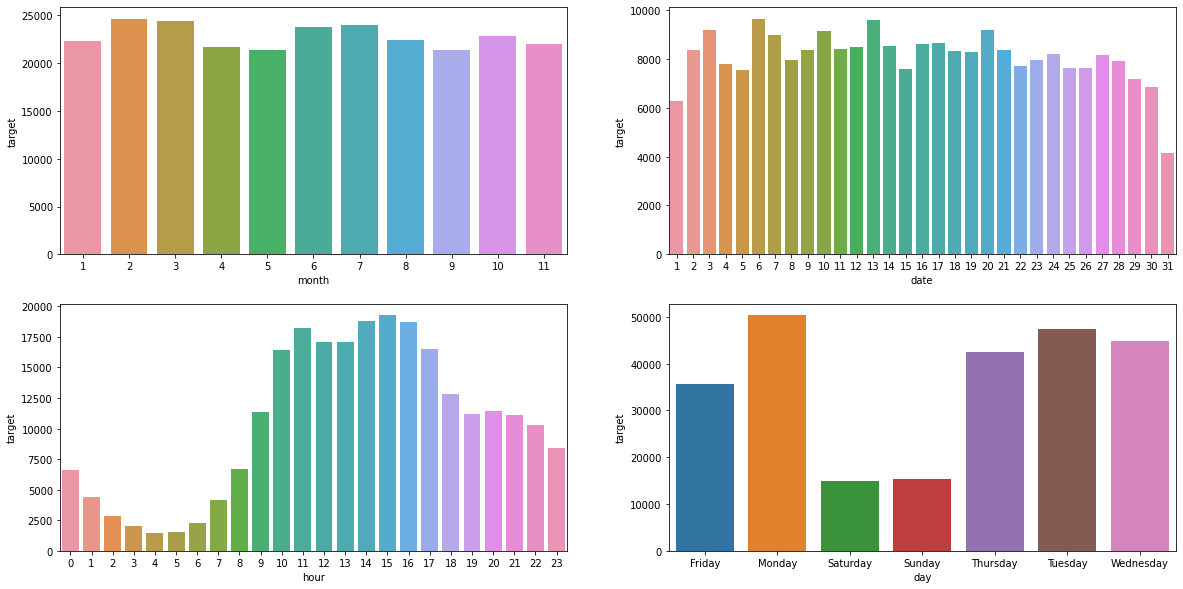

In [87]:
figure, ax =plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,10)


sns.barplot(data = month, x = 'month', y = 'target', ax=ax[0][0])
sns.barplot(data = date, x = 'date', y = 'target', ax=ax[0][1])
sns.barplot(data = hour, x = 'hour', y = 'target', ax=ax[1][0])
sns.barplot(data = day, x = 'day', y = 'target', ax=ax[1][1])


월과 일에는 영향이 별로 없음

낮시간에 이용빈도가 높음

평일에 이용빈도가 높고 주말에는 빈도가 낮음

# 트레인에는 있고 테스트에는 없는데이터 , 테스트에는 있고 트레인에는 없는 데이터 확인하기

In [88]:
for i in test_data.columns : 
  print( i,'의 value_count')
  print(train_data[i].value_counts())
  print(test_data[i].value_counts())
  print('-'*50)

id 의 value_count
2047      1
427130    1
439420    1
441469    1
435326    1
         ..
131861    1
138006    1
135959    1
158488    1
0         1
Name: id, Length: 501951, dtype: int64
2047     1
27975    1
32069    1
30020    1
19779    1
        ..
41633    1
43680    1
21151    1
23198    1
0        1
Name: id, Length: 46404, dtype: int64
--------------------------------------------------
d_l_match_yn 의 value_count
1    315268
0    186683
Name: d_l_match_yn, dtype: int64
1    28798
0    17606
Name: d_l_match_yn, dtype: int64
--------------------------------------------------
d_m_match_yn 의 value_count
0    368324
1    133627
Name: d_m_match_yn, dtype: int64
0    33904
1    12500
Name: d_m_match_yn, dtype: int64
--------------------------------------------------
d_s_match_yn 의 value_count
0    426694
1     75257
Name: d_s_match_yn, dtype: int64
0    39328
1     7076
Name: d_s_match_yn, dtype: int64
--------------------------------------------------
h_l_match_yn 의 value_count
1    

In [89]:
a = []
b = []
for i in test_data.columns :
  if len(train_data[i].value_counts()) == len(test_data[i].value_counts().index) :
    a.append(i)
  else :
    b.append(i)
print(a)
print(b)

['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c', 'person_prefer_e', 'person_prefer_f', 'person_prefer_g', 'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_j_1', 'contents_attribute_j', 'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_m', 'contents_attribute_e', 'person_prefer_d_3_l', 'person_prefer_h_1_l', 'person_prefer_h_2_l', 'person_prefer_h_3_l', 'contents_attribute_h_l']
['id', 'person_rn', 'contents_rn', 'contents_open_dt', 'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m', 'contents_attribute_d_n', 'contents_attribute_d_s', 'contents_attribute_d_m', 'contents_attribute_d_l', 'person_prefer_h_1_m', 'person_pref

In [92]:
for i in a : 
  print(train_data[i].value_counts())
  print(test_data[i].value_counts())
  print('-'*60)

1    315268
0    186683
Name: d_l_match_yn, dtype: int64
1    28798
0    17606
Name: d_l_match_yn, dtype: int64
------------------------------------------------------------
0    368324
1    133627
Name: d_m_match_yn, dtype: int64
0    33904
1    12500
Name: d_m_match_yn, dtype: int64
------------------------------------------------------------
0    426694
1     75257
Name: d_s_match_yn, dtype: int64
0    39328
1     7076
Name: d_s_match_yn, dtype: int64
------------------------------------------------------------
1    399338
0    102613
Name: h_l_match_yn, dtype: int64
1    37315
0     9089
Name: h_l_match_yn, dtype: int64
------------------------------------------------------------
0    318818
1    183133
Name: h_m_match_yn, dtype: int64
0    28957
1    17447
Name: h_m_match_yn, dtype: int64
------------------------------------------------------------
0    365322
1    136629
Name: h_s_match_yn, dtype: int64
0    33430
1    12974
Name: h_s_match_yn, dtype: int64
-----------------------

In [93]:
for i in b : 
  print(train_data[i].value_counts())
  print(test_data[i].value_counts())
  print('-'*60)

# person_prefer_d_1_n, person_prefer_d_1_s, person_prefer_d_1_m, person_prefer_d_1_l, person_prefer_d_2_n
# person_prefer_d_2_s, person_prefer_d_2_m, person_prefer_d_2_l, person_prefer_d_3_n, person_prefer_d_3_s,
# person_prefer_d_3_m, contents_attribute_d_n, contents_attribute_d_s, contents_attribute_d_m, contents_attribute_d_l
# person_prefer_h_1_m, person_prefer_h_2_m, person_prefer_h_3_m, contents_attribute_h_m, contents_attribute_l_n
# contents_attribute_l_s, contents_attribute_l_m, contents_attribute_l_l

2047      1
427130    1
439420    1
441469    1
435326    1
         ..
131861    1
138006    1
135959    1
158488    1
0         1
Name: id, Length: 501951, dtype: int64
2047     1
27975    1
32069    1
30020    1
19779    1
        ..
41633    1
43680    1
21151    1
23198    1
0        1
Name: id, Length: 46404, dtype: int64
------------------------------------------------------------
627445     20
827703     19
241140     19
1047079    19
53891      18
           ..
528335      1
503424      1
24190       1
988412      1
295445      1
Name: person_rn, Length: 300177, dtype: int64
993298    15
427267    11
992664    10
212364    10
288636    10
          ..
335888     1
333821     1
428350     1
727063     1
331778     1
Name: person_rn, Length: 34534, dtype: int64
------------------------------------------------------------
22078     39
76824     36
138209    32
72025     29
402922    28
          ..
286745     1
272400     1
315407     1
313356     1
524288     1
Name: contents_rn

In [128]:
# person_prefer_d_1_n, person_prefer_d_1_s, person_prefer_d_1_m, person_prefer_d_1_l, person_prefer_d_2_n
# person_prefer_d_2_s, person_prefer_d_2_m, person_prefer_d_2_l, person_prefer_d_3_n, person_prefer_d_3_s,
# person_prefer_d_3_m, contents_attribute_d_n, contents_attribute_d_s, contents_attribute_d_m, contents_attribute_d_l
# person_prefer_h_1_m, person_prefer_h_2_m, person_prefer_h_3_m, contents_attribute_h_m, contents_attribute_l_n
# contents_attribute_l_s, contents_attribute_l_m, contents_attribute_l_l
x = []

#train_data['person_prefer_d_1_n'].values
for i in train_data['person_prefer_d_1_n'].value_counts().index.values : 
  if i not in test_data['person_prefer_d_1_n'].value_counts().index.values :
    x.append(i)

print(x)
print(len(x))

[511, 814, 678, 1099, 536, 867, 731, 828, 830, 686, 1162, 85, 273, 554, 602, 478, 480, 223, 858, 606, 654, 557, 7, 1223, 589, 380, 443, 553, 4, 730, 1185, 86, 621, 829, 504, 193, 1253, 1258, 472, 919, 84, 444, 476, 66, 76, 442, 488, 484, 737, 230, 191, 517]
52


In [129]:
print(len(train_data['person_prefer_d_1_n'].value_counts().index.values))
print(len(test_data['person_prefer_d_1_n'].value_counts().index.values))

443
391


In [138]:
check_list = ['person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l', 
              'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l', 
              'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m', 'contents_attribute_d_n', 
              'contents_attribute_d_s', 'contents_attribute_d_m', 'contents_attribute_d_l', 'person_prefer_h_1_m', 
              'person_prefer_h_2_m', 'person_prefer_h_3_m', 'contents_attribute_h_m', 'contents_attribute_l_n', 
              'contents_attribute_l_s', 'contents_attribute_l_m', 'contents_attribute_l_l']


## 트레인에는 있고 테스트에는 없는 데이터들

for i in check_list :
  x = []
  for j in train_data[i].value_counts().index.values : 
    if j not in test_data[i].value_counts().index.values :
      x.append(j)
  print(i)
  print(x)
  print(len(x))
  print('-'*60) 

person_prefer_d_1_n
[511, 814, 678, 1099, 536, 867, 731, 828, 830, 686, 1162, 85, 273, 554, 602, 478, 480, 223, 858, 606, 654, 557, 7, 1223, 589, 380, 443, 553, 4, 730, 1185, 86, 621, 829, 504, 193, 1253, 1258, 472, 919, 84, 444, 476, 66, 76, 442, 488, 484, 737, 230, 191, 517]
52
------------------------------------------------------------
person_prefer_d_1_s
[273, 440, 1258, 470, 488]
5
------------------------------------------------------------
person_prefer_d_1_m
[1258]
1
------------------------------------------------------------
person_prefer_d_1_l
[1258]
1
------------------------------------------------------------
person_prefer_d_2_n
[1099, 832, 692, 462, 641, 1050, 863, 65, 512, 218, 1166, 643, 199, 858, 588, 273, 230, 1223, 587, 314, 919, 1252, 192, 376, 1239, 263, 773, 510, 1245, 474, 1096, 1247, 5, 596, 69, 76, 887, 878, 606, 1151, 191, 85, 1258, 475, 503, 1190, 443, 480, 311, 1253, 553, 621, 872, 1221, 476, 555, 354, 489, 1161, 605, 380, 1167, 504, 498, 828, 556, 84, 488

In [139]:
## 테스트에는 있고 트레인에는 없는 데이터들

for i in check_list :
  x = []
  for j in test_data[i].value_counts().index.values : 
    if j not in train_data[i].value_counts().index.values :
      x.append(j)
  print(i)
  print(x)
  print(len(x))
  print('-'*60) 

person_prefer_d_1_n
[]
0
------------------------------------------------------------
person_prefer_d_1_s
[]
0
------------------------------------------------------------
person_prefer_d_1_m
[]
0
------------------------------------------------------------
person_prefer_d_1_l
[]
0
------------------------------------------------------------
person_prefer_d_2_n
[445]
1
------------------------------------------------------------
person_prefer_d_2_s
[]
0
------------------------------------------------------------
person_prefer_d_2_m
[]
0
------------------------------------------------------------
person_prefer_d_2_l
[]
0
------------------------------------------------------------
person_prefer_d_3_n
[1185, 380]
2
------------------------------------------------------------
person_prefer_d_3_s
[]
0
------------------------------------------------------------
person_prefer_d_3_m
[]
0
------------------------------------------------------------
contents_attribute_d_n
[445, 828]
2
------

테스트에는 있고 트레인에는 없는데이터들을 어떻게 처리해야될까?? 

person_prefer_d_2_n

[445]

person_prefer_d_3_n

[1185, 380]

contents_attribute_d_n

[445, 828]

contents_attribute_l_n

[44, 1431, 273]

# 피어슨 상관 계수 구하기

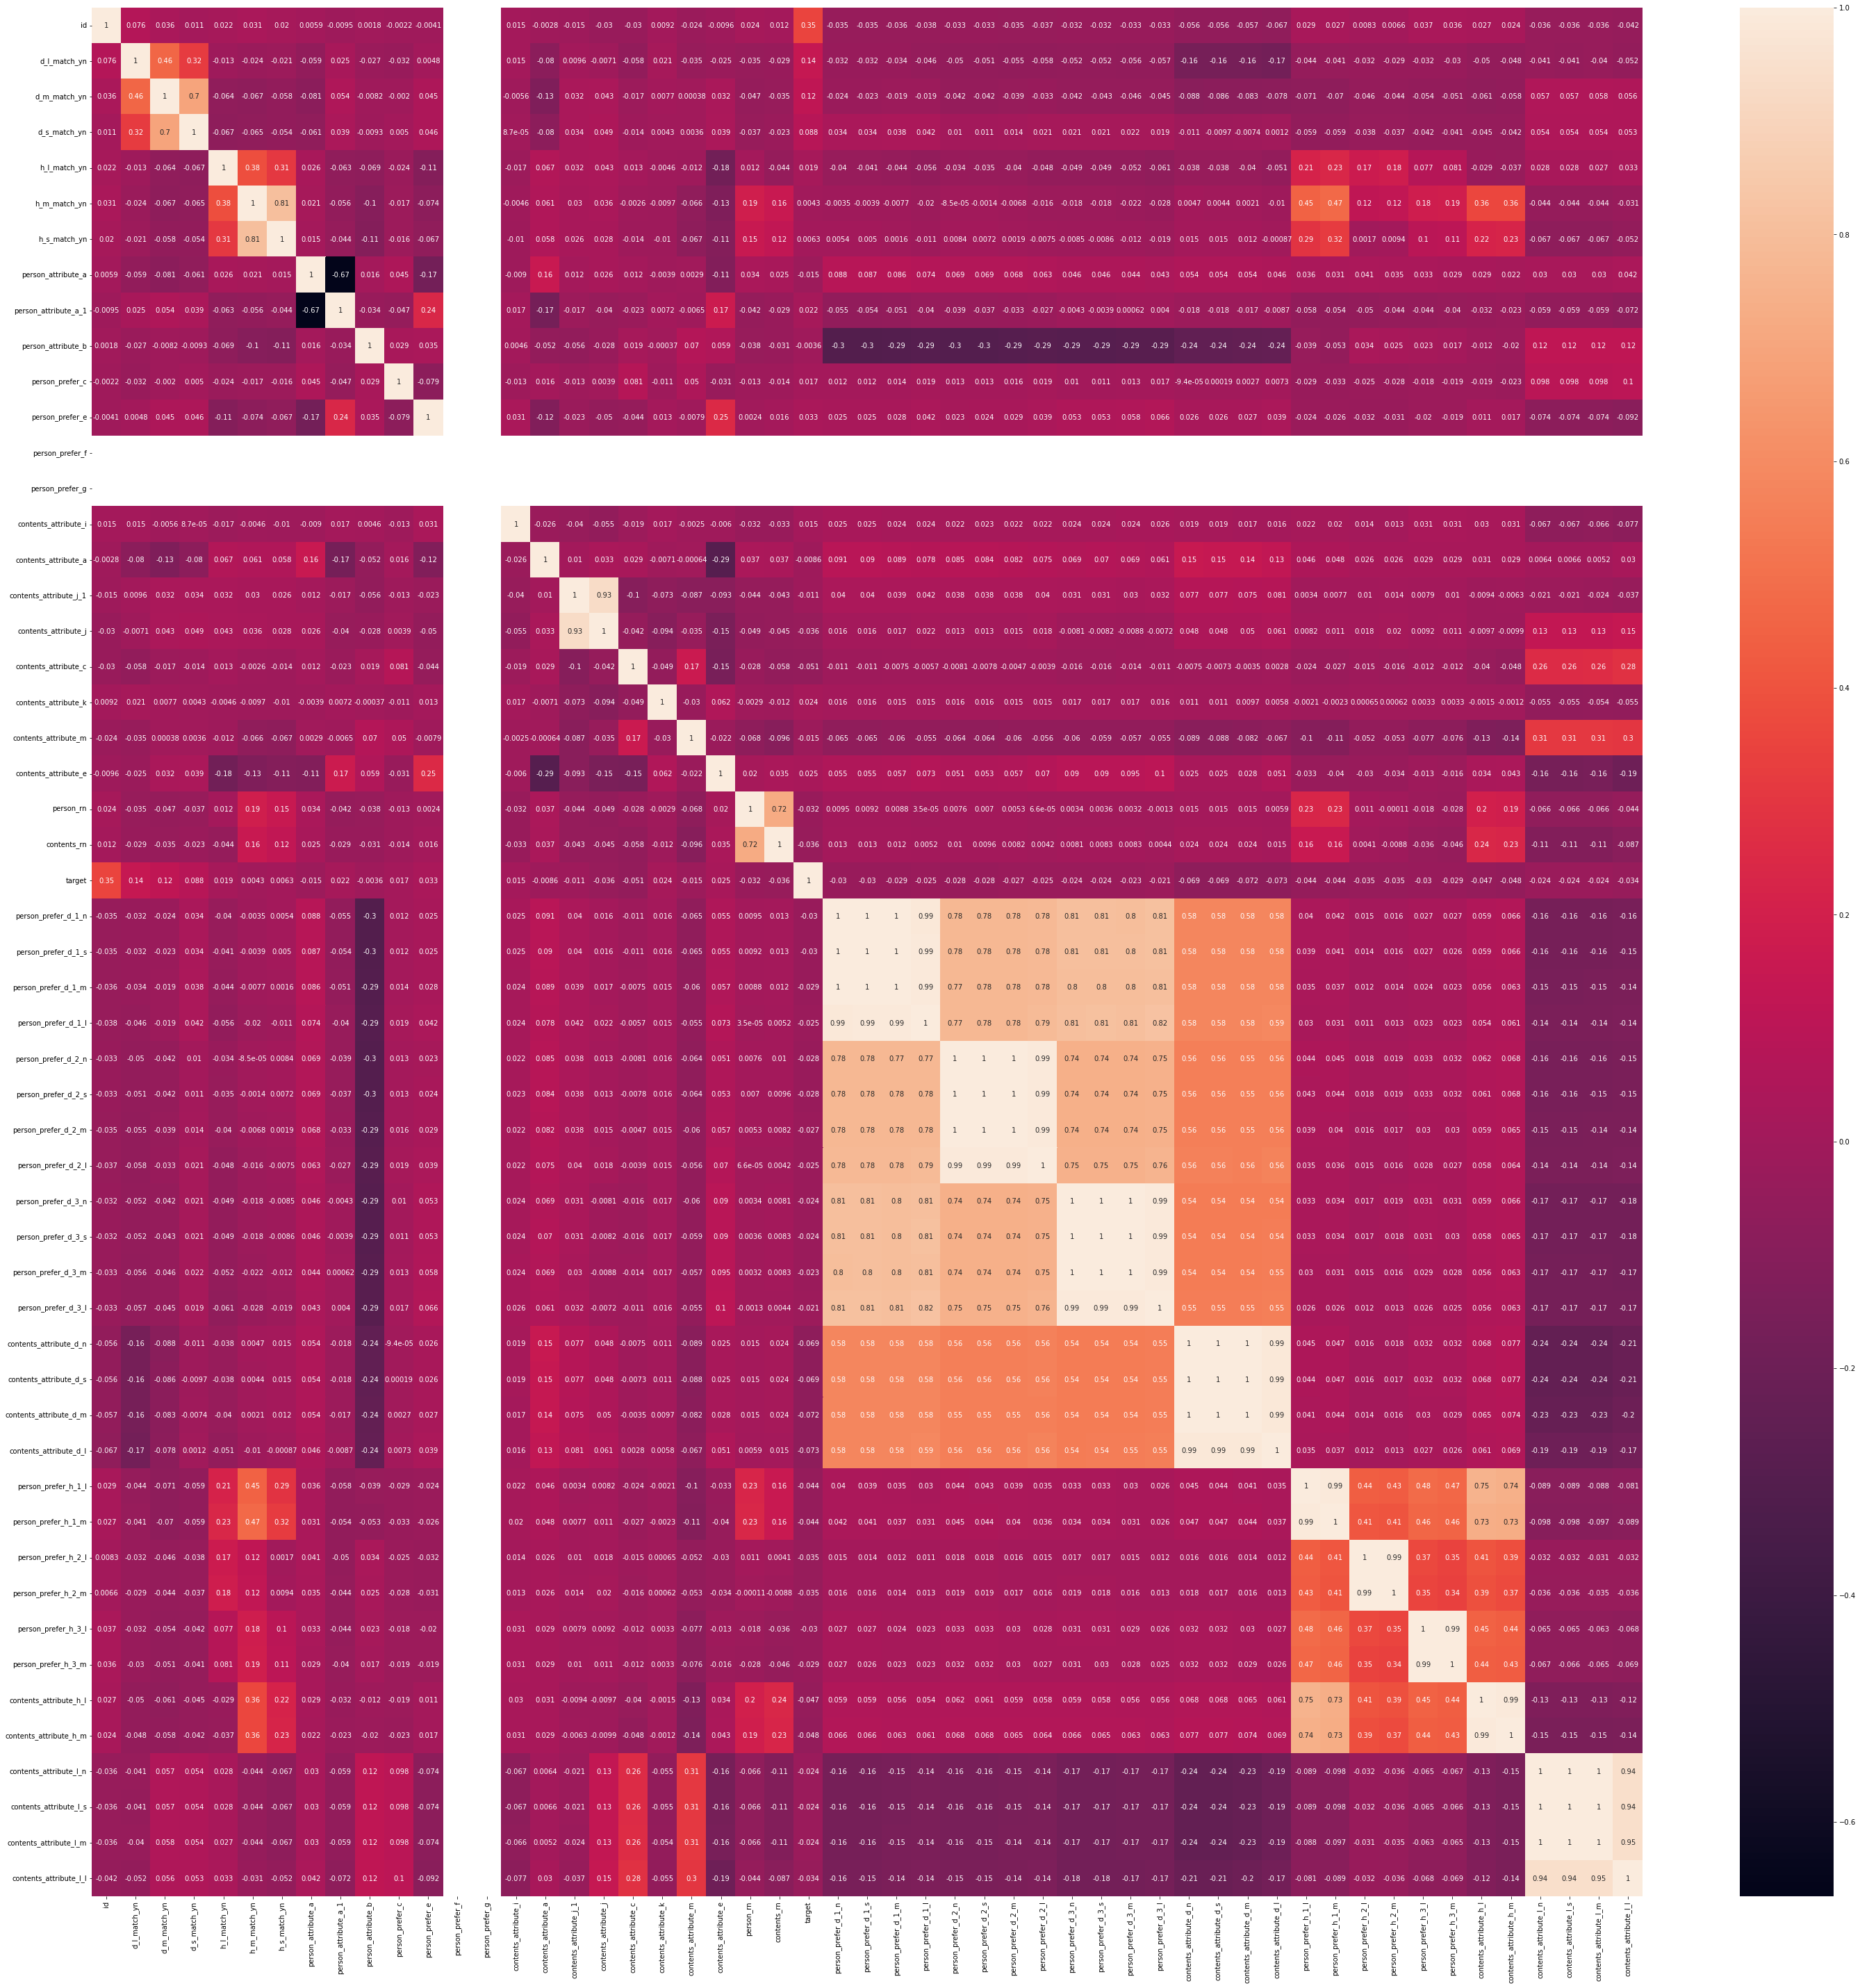

In [157]:
plt.figure(figsize = (50, 50))
sns.heatmap(train_data.corr(method = 'pearson'), annot = True)

딱히 큰 차이가 없음

# 모델

In [159]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [160]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score



In [164]:
df = train_data.drop(['id','target','contents_open_dt'],axis = 1)
target = train_data['target']

In [165]:
models = {
    'catboost' : CatBoostClassifier(),
    'Xgboost' : XGBClassifier(),
    'lightgbm' : LGBMClassifier(),
    'Random Forest' : RandomForestClassifier()
}

for key, classifier in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 42)
  model = classifier
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('f1 : ', round(f1_score(y_test,y_pred), 4))
  print('-'*100)

Learning rate set to 0.133271
0:	learn: 0.6877505	total: 123ms	remaining: 2m 2s
1:	learn: 0.6837187	total: 244ms	remaining: 2m 1s
2:	learn: 0.6804358	total: 360ms	remaining: 1m 59s
3:	learn: 0.6780099	total: 486ms	remaining: 2m 1s
4:	learn: 0.6761248	total: 615ms	remaining: 2m 2s
5:	learn: 0.6745749	total: 740ms	remaining: 2m 2s
6:	learn: 0.6732318	total: 866ms	remaining: 2m 2s
7:	learn: 0.6718808	total: 977ms	remaining: 2m 1s
8:	learn: 0.6708877	total: 1.1s	remaining: 2m 1s
9:	learn: 0.6700298	total: 1.22s	remaining: 2m
10:	learn: 0.6692411	total: 1.35s	remaining: 2m 1s
11:	learn: 0.6685408	total: 1.46s	remaining: 2m
12:	learn: 0.6679494	total: 1.59s	remaining: 2m
13:	learn: 0.6673967	total: 1.71s	remaining: 2m
14:	learn: 0.6667892	total: 1.82s	remaining: 1m 59s
15:	learn: 0.6662790	total: 1.95s	remaining: 1m 59s
16:	learn: 0.6658205	total: 2.08s	remaining: 2m
17:	learn: 0.6653952	total: 2.2s	remaining: 1m 59s
18:	learn: 0.6649322	total: 2.31s	remaining: 1m 59s
19:	learn: 0.6644533	to